In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ["date_time","open","high","low","close","up","down"]
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'], axis=1, inplace=True)
    return data

startDate = "20070101"
endDate = "20190914"
filename = "@GC_60min_Exchange.txt"
dataset = load_data(filename)
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))
dataset = dataset.loc[startDateParsed:endDateParsed]
dataset["hour"] = dataset.index.hour
dataset['DOM'] = dataset.index.day
dataset['DOW'] = dataset.index.dayofweek
dataset['Week'] = dataset.index.week
dataset['Month'] = dataset.index.month
dataset['DeltaClosePerc'] = round((dataset.close - dataset.close.shift(1)) / dataset.close.shift(1) * 100,2)
dataset['CloseOpenPerc'] = round((dataset.close - dataset.open) / dataset.open * 100,2)
dataset.tail(23)

,open,high,low,close,volume,hour,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc
date_time,,,,,,,,,,,,
2019-09-12 19:00:00,1506.5,1507.2,1502.9,1504.6,3620,19,12,3,37,9,-0.15,-0.13
2019-09-12 20:00:00,1504.5,1506.0,1503.4,1505.4,2976,20,12,3,37,9,0.05,0.06
2019-09-12 21:00:00,1505.4,1508.6,1504.3,1506.1,8114,21,12,3,37,9,0.05,0.05
2019-09-12 22:00:00,1506.1,1506.4,1503.1,1504.4,5637,22,12,3,37,9,-0.11,-0.11
2019-09-12 23:00:00,1504.4,1505.6,1503.6,1504.2,3244,23,12,3,37,9,-0.01,-0.01
2019-09-13 00:00:00,1504.2,1505.3,1503.8,1505.1,2122,0,13,4,37,9,0.06,0.06
2019-09-13 01:00:00,1505.1,1506.4,1505.0,1505.4,2267,1,13,4,37,9,0.02,0.02
2019-09-13 02:00:00,1505.4,1505.5,1504.2,1505.1,2362,2,13,4,37,9,-0.02,-0.02
2019-09-13 03:00:00,1505.0,1513.5,1504.9,1512.5,14072,3,13,4,37,9,0.49,0.50


In [2]:
dataset[-23:].iplot(kind='candle',theme='white',
                        up_color='green', down_color='red',
                        title = "Gold Continuous Futures [GC]", xTitle = "Tempo", yTitle = "Prezzo")

In [3]:
daily = dataset.iloc[:,6:].resample('D').mean()
daily['DailyCloseOpenPerc'] = dataset.resample('D')['CloseOpenPerc'].sum()
daily['DailyDeltaClosePerc'] = dataset.resample('D')['DeltaClosePerc'].sum()
daily.tail(10)

,DOM,DOW,Week,Month,DeltaClosePerc,CloseOpenPerc,DailyCloseOpenPerc,DailyDeltaClosePerc
date_time,,,,,,,,
2019-09-04,4.0,2.0,36.0,9.0,-0.001739,-0.002609,-0.06,-0.04
2019-09-05,5.0,3.0,36.0,9.0,-0.082174,-0.077826,-1.79,-1.89
2019-09-06,6.0,4.0,36.0,9.0,-0.027778,-0.028333,-0.51,-0.50
2019-09-07,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2019-09-08,8.0,6.0,36.0,9.0,0.036000,0.016000,0.08,0.18
2019-09-09,9.0,0.0,37.0,9.0,-0.059565,-0.060870,-1.40,-1.37
2019-09-10,10.0,1.0,37.0,9.0,0.003478,0.002609,0.06,0.08
2019-09-11,11.0,2.0,37.0,9.0,0.005652,0.004348,0.10,0.13
2019-09-12,12.0,3.0,37.0,9.0,0.011739,0.012609,0.29,0.27


In [4]:
daily['DailyCloseOpenPerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

count    4639.000000
mean        0.008319
std         0.814086
min        -6.550000
10%        -0.850000
20%        -0.420000
30%        -0.190000
40%        -0.020000
50%         0.000000
60%         0.060000
70%         0.230000
80%         0.470000
90%         0.880000
max         8.910000
Name: DailyCloseOpenPerc, dtype: float64

In [5]:
daily['DailyDeltaClosePerc'].describe(percentiles = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90])

count    4639.000000
mean        0.015363
std         0.820647
min        -6.190000
10%        -0.840000
20%        -0.430000
30%        -0.180000
40%        -0.010000
50%         0.000000
60%         0.070000
70%         0.250000
80%         0.470000
90%         0.900000
max         8.660000
Name: DailyDeltaClosePerc, dtype: float64

In [6]:
dow = {"Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

biasWeeklyIntraday = []
biasWeeklyOverNight = []

for dkey, dvalue in dow.items():
    biasWeeklyIntraday.append(daily[(daily['DOW'] == dvalue)]['DailyCloseOpenPerc'].mean())
    biasWeeklyOverNight.append(daily[(daily['DOW'] == dvalue)]['DailyDeltaClosePerc'].mean())

print("")
print("Intraday:")
print(len(biasWeeklyIntraday))
print(biasWeeklyIntraday)
print("")
print("OverNight:")
print(len(biasWeeklyOverNight))
print(biasWeeklyOverNight)


Intraday:
7
[-0.050467571644042246, 0.0060633484162895945, 0.02273001508295627, -0.05226244343891405, 0.12547286821705428, nan, 0.010182926829268295]

OverNight:
7
[-0.044917043740573155, 0.014298642533936643, 0.024419306184012064, -0.043619909502262445, 0.12677519379844962, nan, 0.034344512195121954]


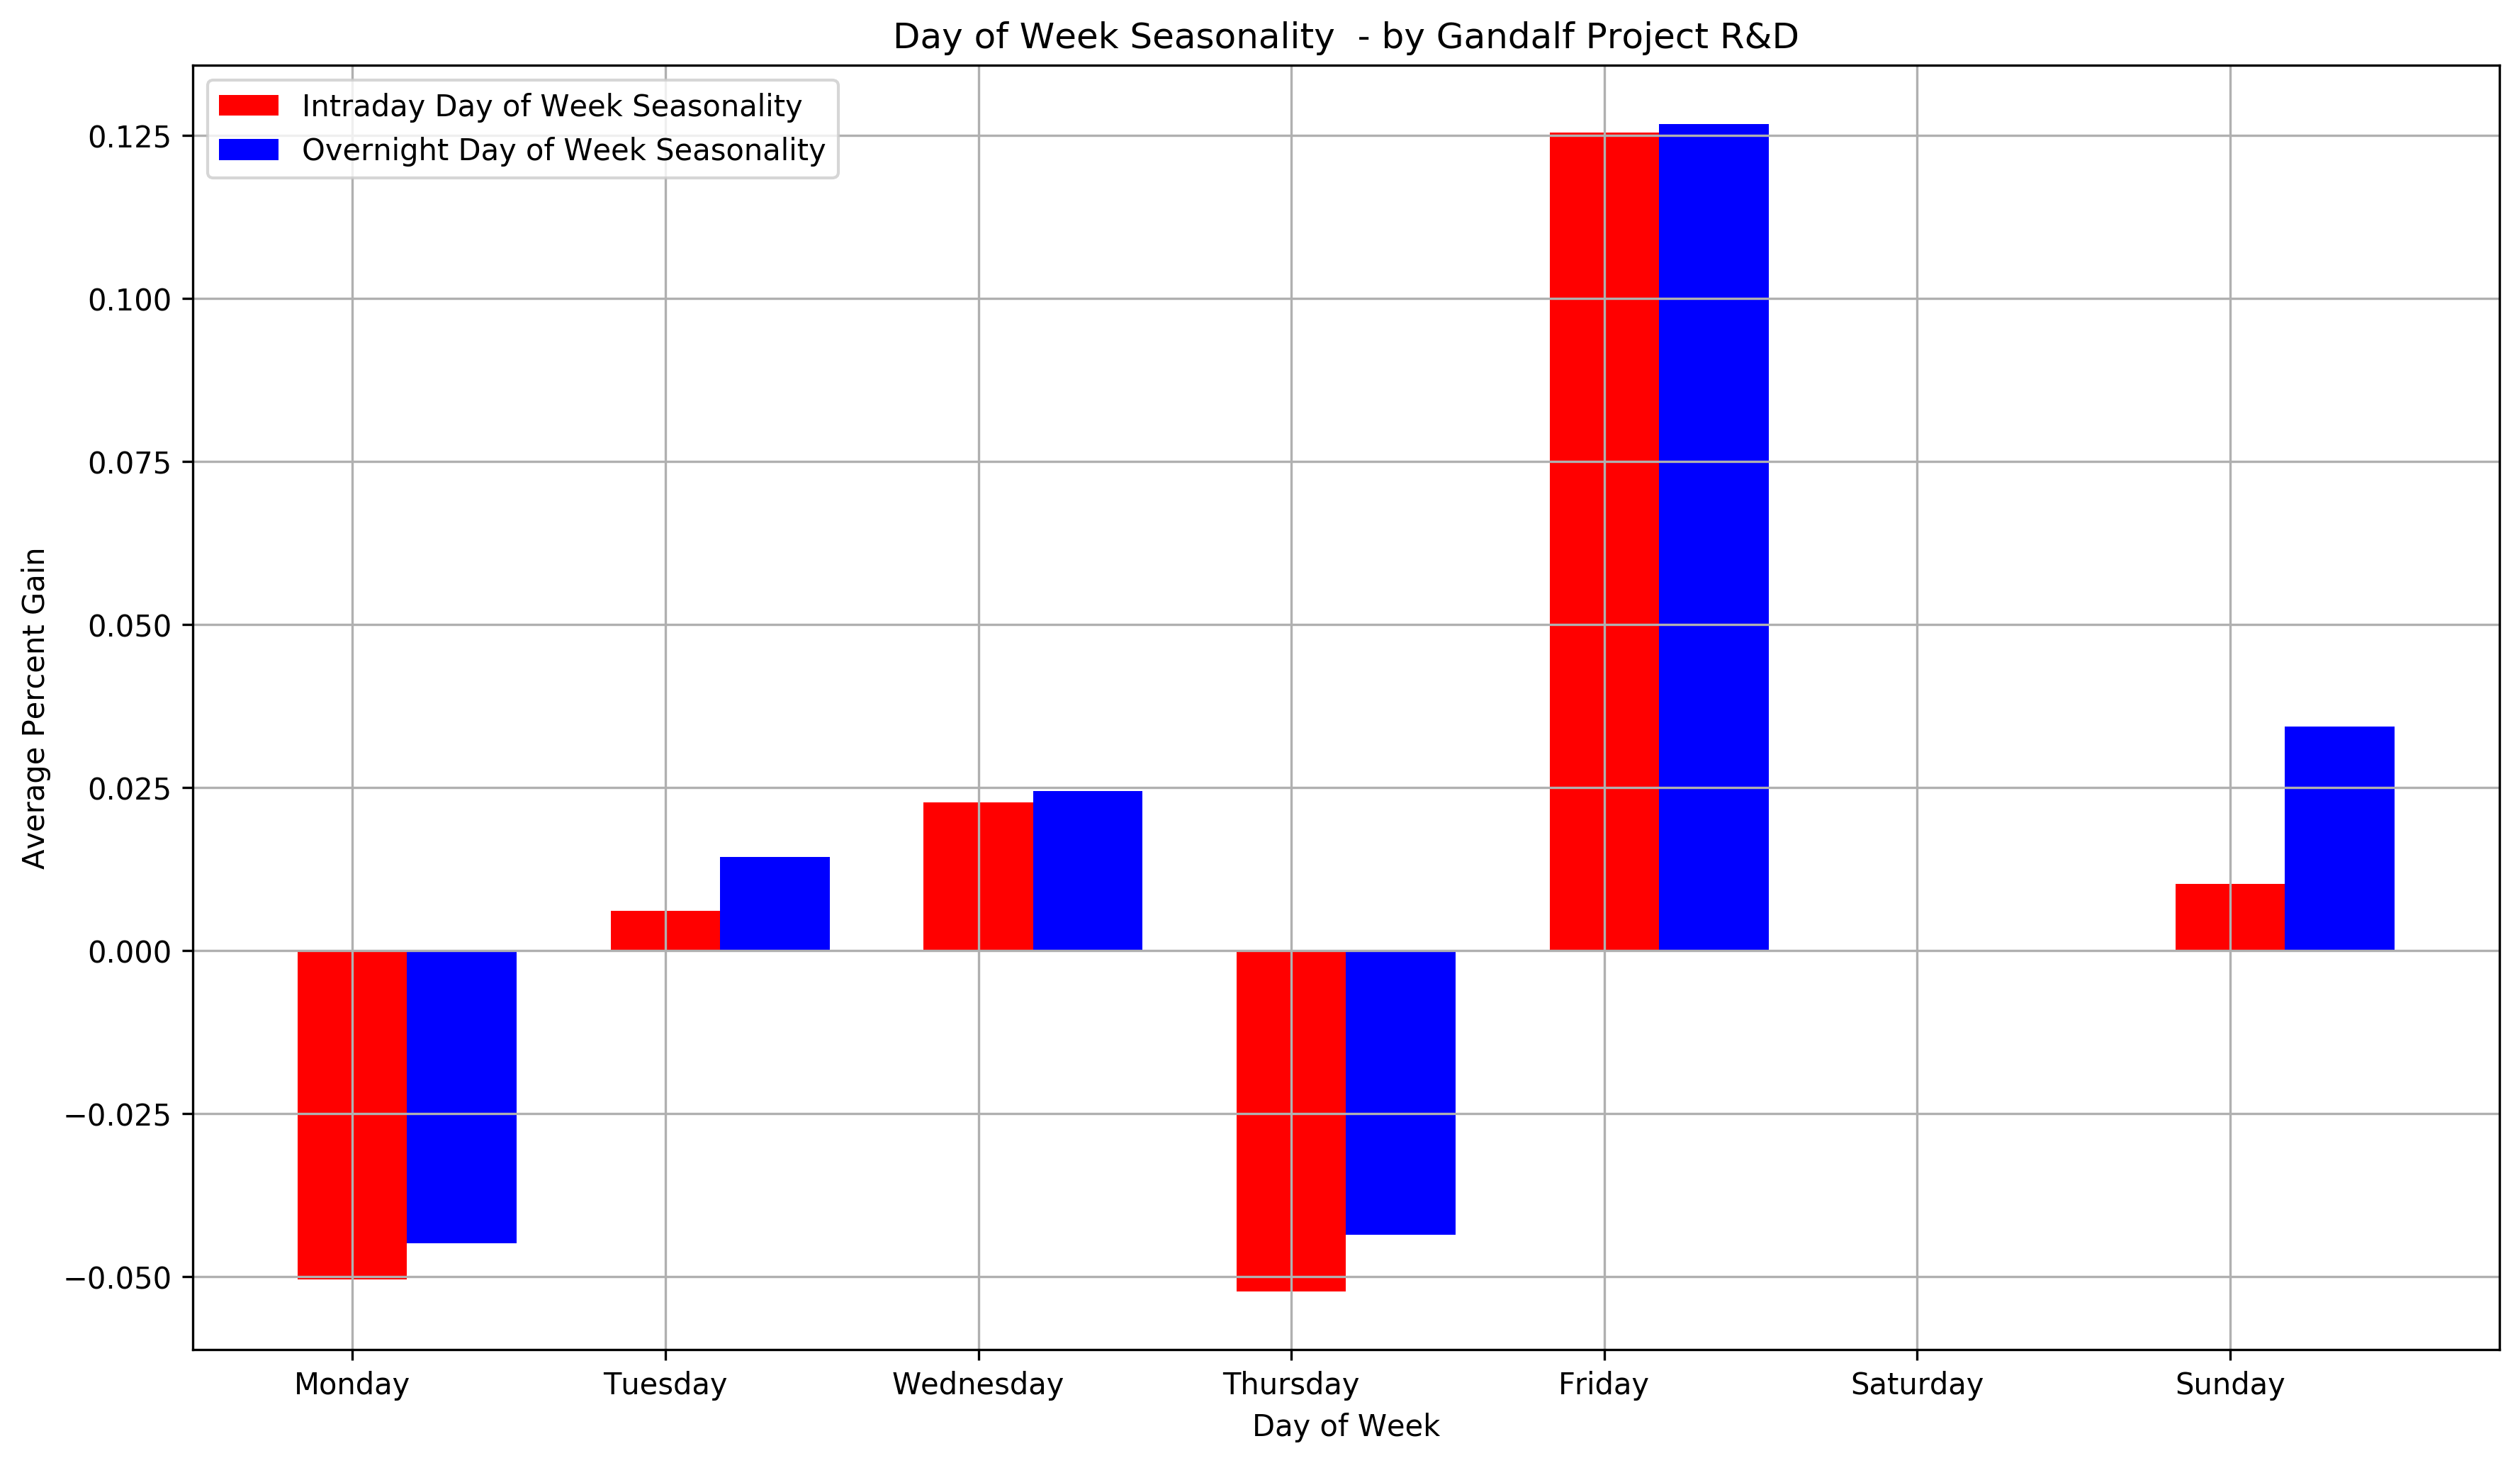

In [7]:
# ************** MODULO GRAFICO ************************************
n_groups = 7

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                biasWeeklyIntraday, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Day of Week Seasonality')

rects1 = ax.bar(index + bar_width, 
                biasWeeklyOverNight, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Overnight Day of Week Seasonality')

ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Percent Gain')
ax.set_title('Day of Week Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO ************************************

# Percentuale occorrenze positive e negative

In [8]:
def percPosNeg(array, soglia):
    """
    Funzione che restituisce le percentuali di valori 
    maggiori e minori di una soglia
    """
    if len(array) == 0:
        return 0,0
    contapos = 0
    contaneg = 0
    for el in array:
        if el > soglia:
            contapos+=1
        if el <= soglia:
            contaneg+=1
    return round(contapos/len(array)*100,2), round(contaneg/len(array)*100,2)

In [9]:
dow = {"Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

DayOfWeek_Intraday_Statistics = []
DayOfWeek_OverNight_Statistics = []

daysofweek_names = list(dow.keys())

for dkey, dvalue in dow.items():

    intraday = daily[(daily['DOW'] == dvalue)]['DailyCloseOpenPerc'].dropna()
    DayOfWeek_Intraday_Statistics.append(percPosNeg(intraday,0))
    
    overnight = daily[(daily['DOW'] == dvalue)]['DailyDeltaClosePerc'].dropna()
    DayOfWeek_OverNight_Statistics.append(percPosNeg(overnight,0))

print("Statistics Intraday:")
for el in range(len(DayOfWeek_Intraday_Statistics)):
    if biasWeeklyIntraday[el] > 0:
        print(daysofweek_names[el], round(biasWeeklyIntraday[el],4), DayOfWeek_Intraday_Statistics[el][0], "%")
    if biasWeeklyIntraday[el] <= 0:
        print(daysofweek_names[el], round(biasWeeklyIntraday[el],4), DayOfWeek_Intraday_Statistics[el][1], "%")
        
print("")
print("Statistics Overnight:")
for el in range(len(DayOfWeek_OverNight_Statistics)):
    if biasWeeklyOverNight[el] > 0:
        print(daysofweek_names[el], round(biasWeeklyOverNight[el],4), DayOfWeek_OverNight_Statistics[el][0], "%")
    if biasWeeklyOverNight[el] <= 0:
        print(daysofweek_names[el], round(biasWeeklyOverNight[el],4), DayOfWeek_OverNight_Statistics[el][1], "%")

Statistics Intraday:
Monday -0.0505 49.77 %
Tuesday 0.0061 52.19 %
Wednesday 0.0227 50.98 %
Thursday -0.0523 51.73 %
Friday 0.1255 57.36 %
Sunday 0.0102 51.07 %

Statistics Overnight:
Monday -0.0449 49.92 %
Tuesday 0.0143 52.19 %
Wednesday 0.0244 50.98 %
Thursday -0.0436 51.58 %
Friday 0.1268 57.67 %
Sunday 0.0343 53.05 %


In [14]:
a = daily[(daily["DOW"] == 4)]

a.DailyCloseOpenPerc.iplot(kind='scatter', mode = "markers", color = "blue", theme='white', showlegend = True,
                           title = "Friday Intraday Movements", xTitle = "Price", yTitle = "Occurrencies")

# Statistiche settimanali calcolate per Mese:

In [10]:
dow = {"Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

months = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
                "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}

print(dow)
print("")
print(months)

{'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

{'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}


In [11]:
def month_plot(intraday,overnight,month):
    n_groups = 7
    fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = ax.bar(index, 
                    intraday, 
                    bar_width, 
                    alpha=opacity, 
                    color='red', 
                    label='Intraday Day of Week Seasonality')

    rects1 = ax.bar(index + bar_width, 
                    overnight, 
                    bar_width, 
                    alpha=opacity, 
                    color='blue', 
                    label='Overnight Day of Week Seasonality')

    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Average Percent Gain')
    ax.set_title('Day of Week Seasonality ' + 'on ' + month + ' - by Gandalf Project R&D')
    ax.set_xticks(index)
    ax.set_xticklabels((["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))
    ax.legend()
    ax.grid(True)
    plt.show()

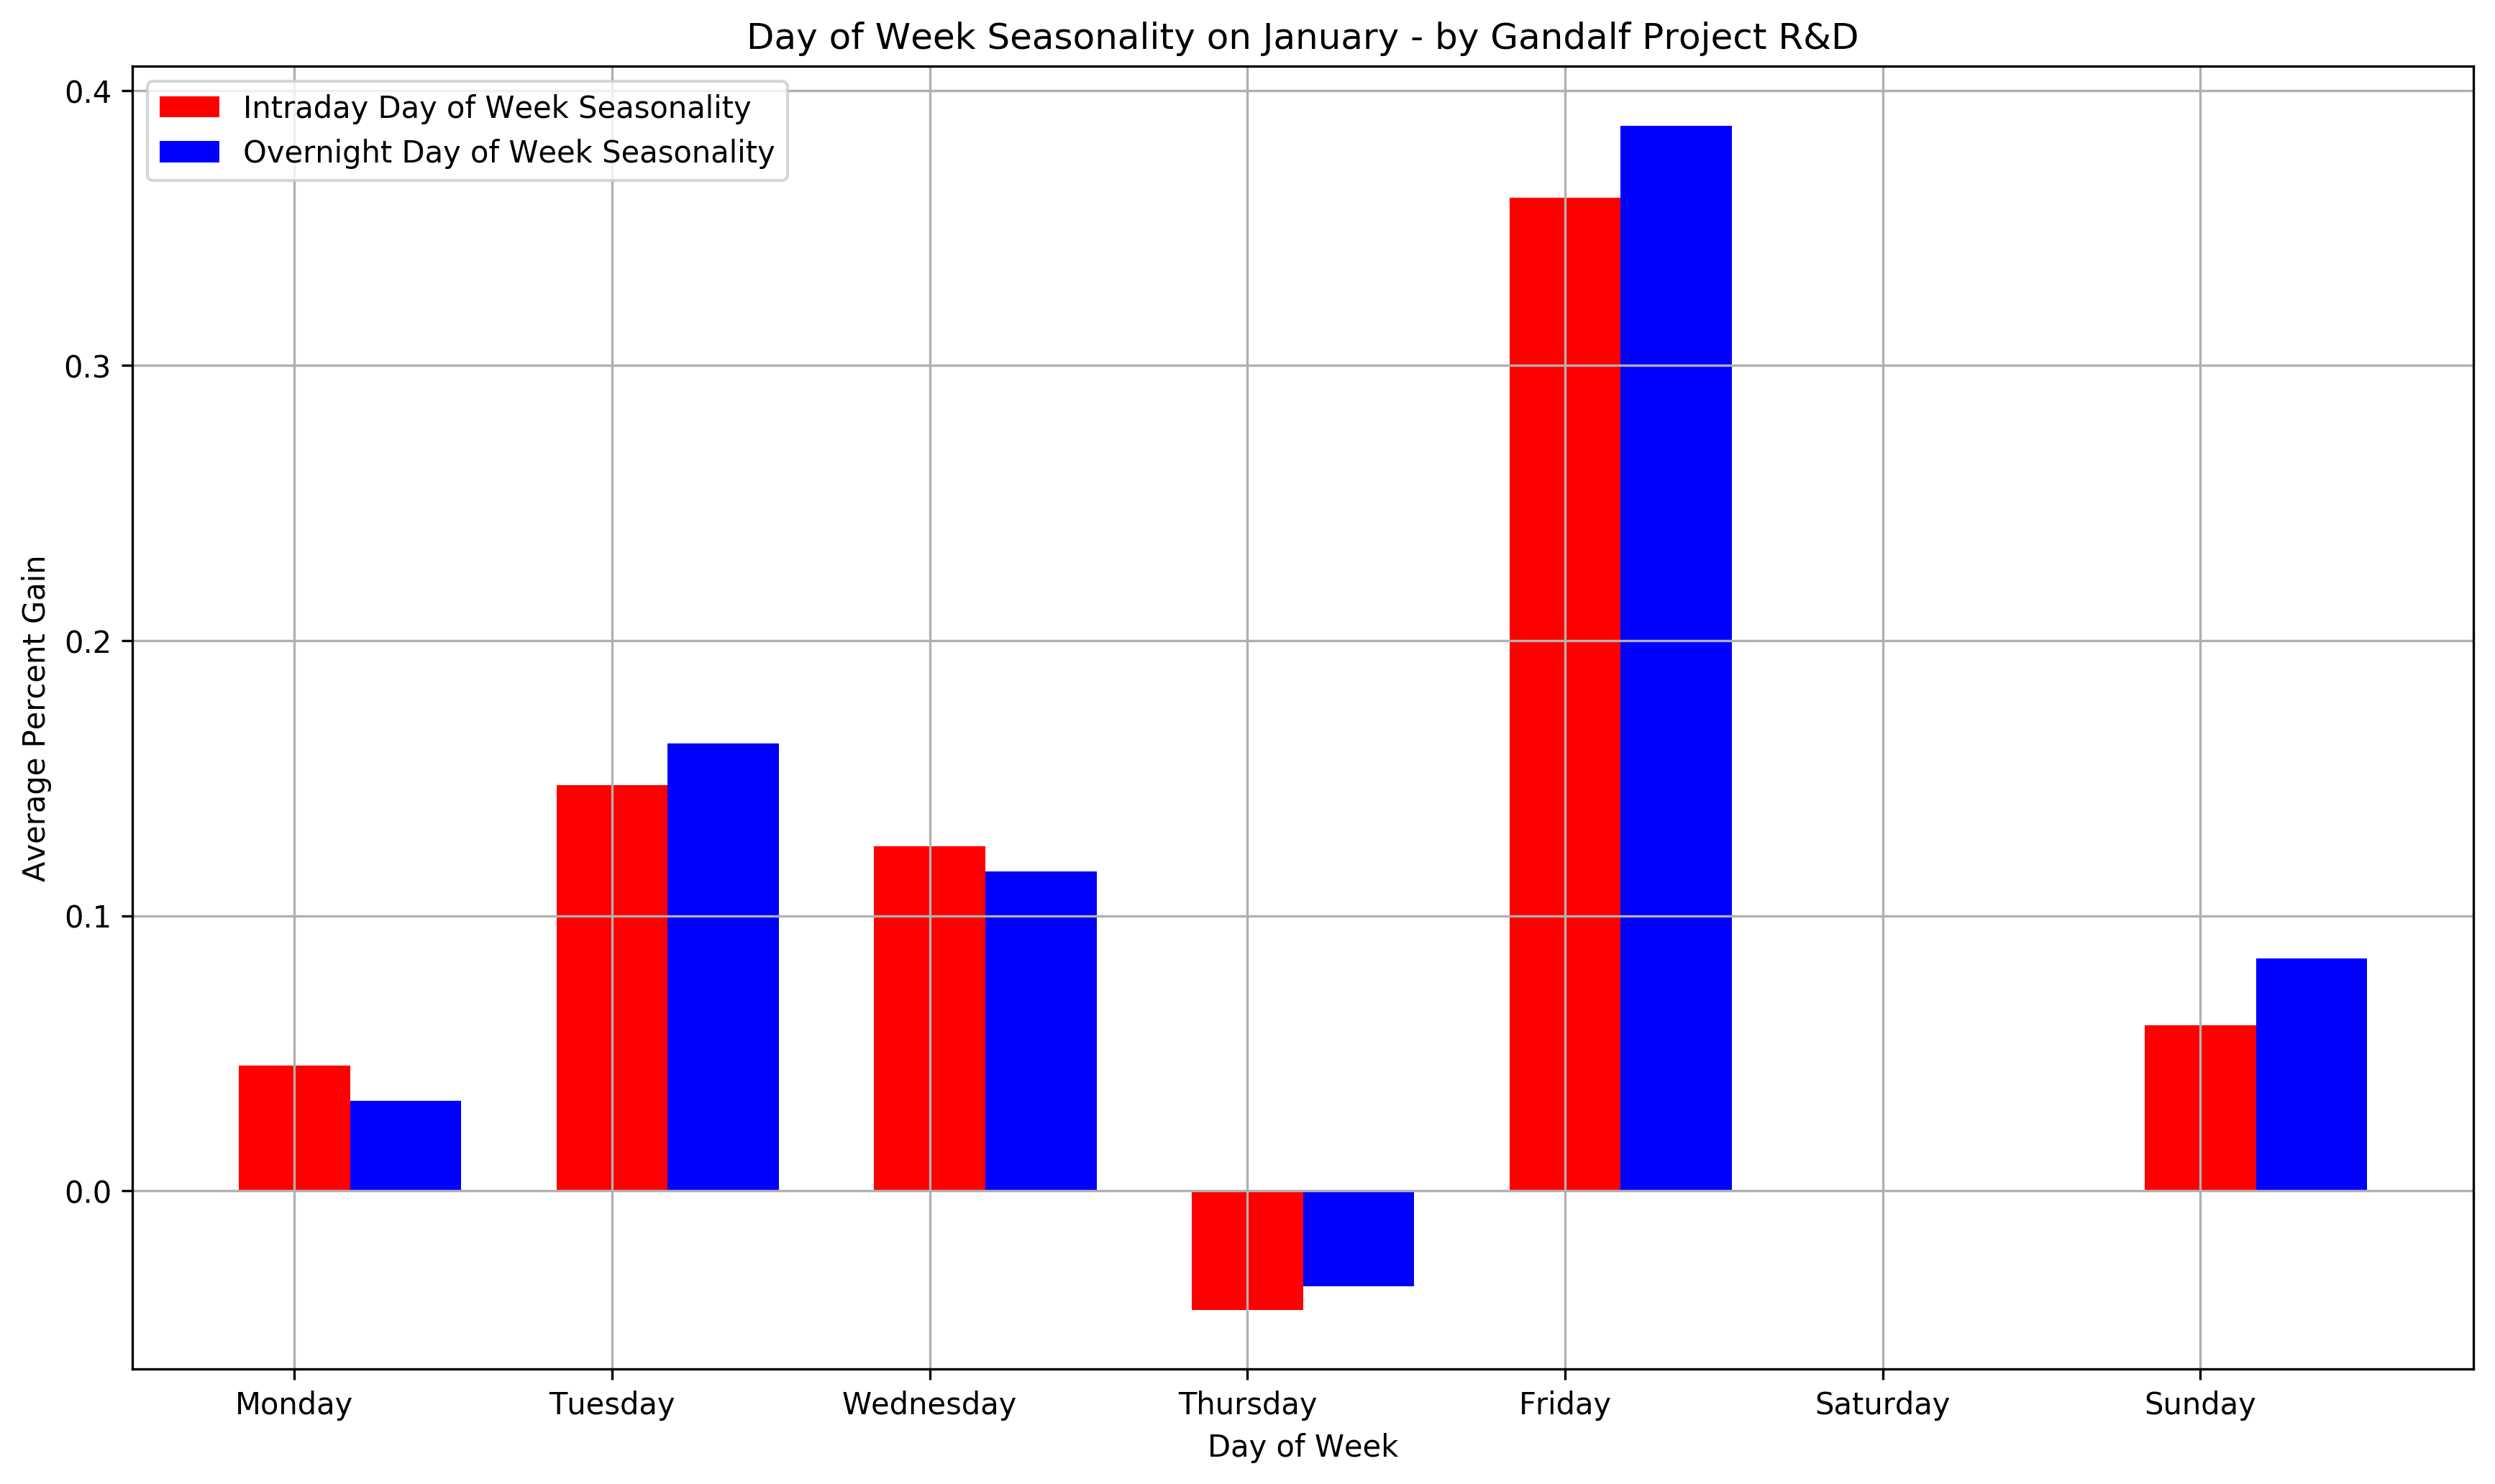

Statistics Intraday:
Monday 0.0454 52.63 %
Tuesday 0.1475 62.71 %
Wednesday 0.1253 56.9 %
Thursday -0.0433 50.0 %
Friday 0.3609 58.18 %
Sunday 0.0602 67.27 %

Statistics Overnight:
Monday 0.0328 56.14 %
Tuesday 0.1625 61.02 %
Wednesday 0.116 58.62 %
Thursday -0.0347 50.0 %
Friday 0.3873 60.0 %
Sunday 0.0845 63.64 %



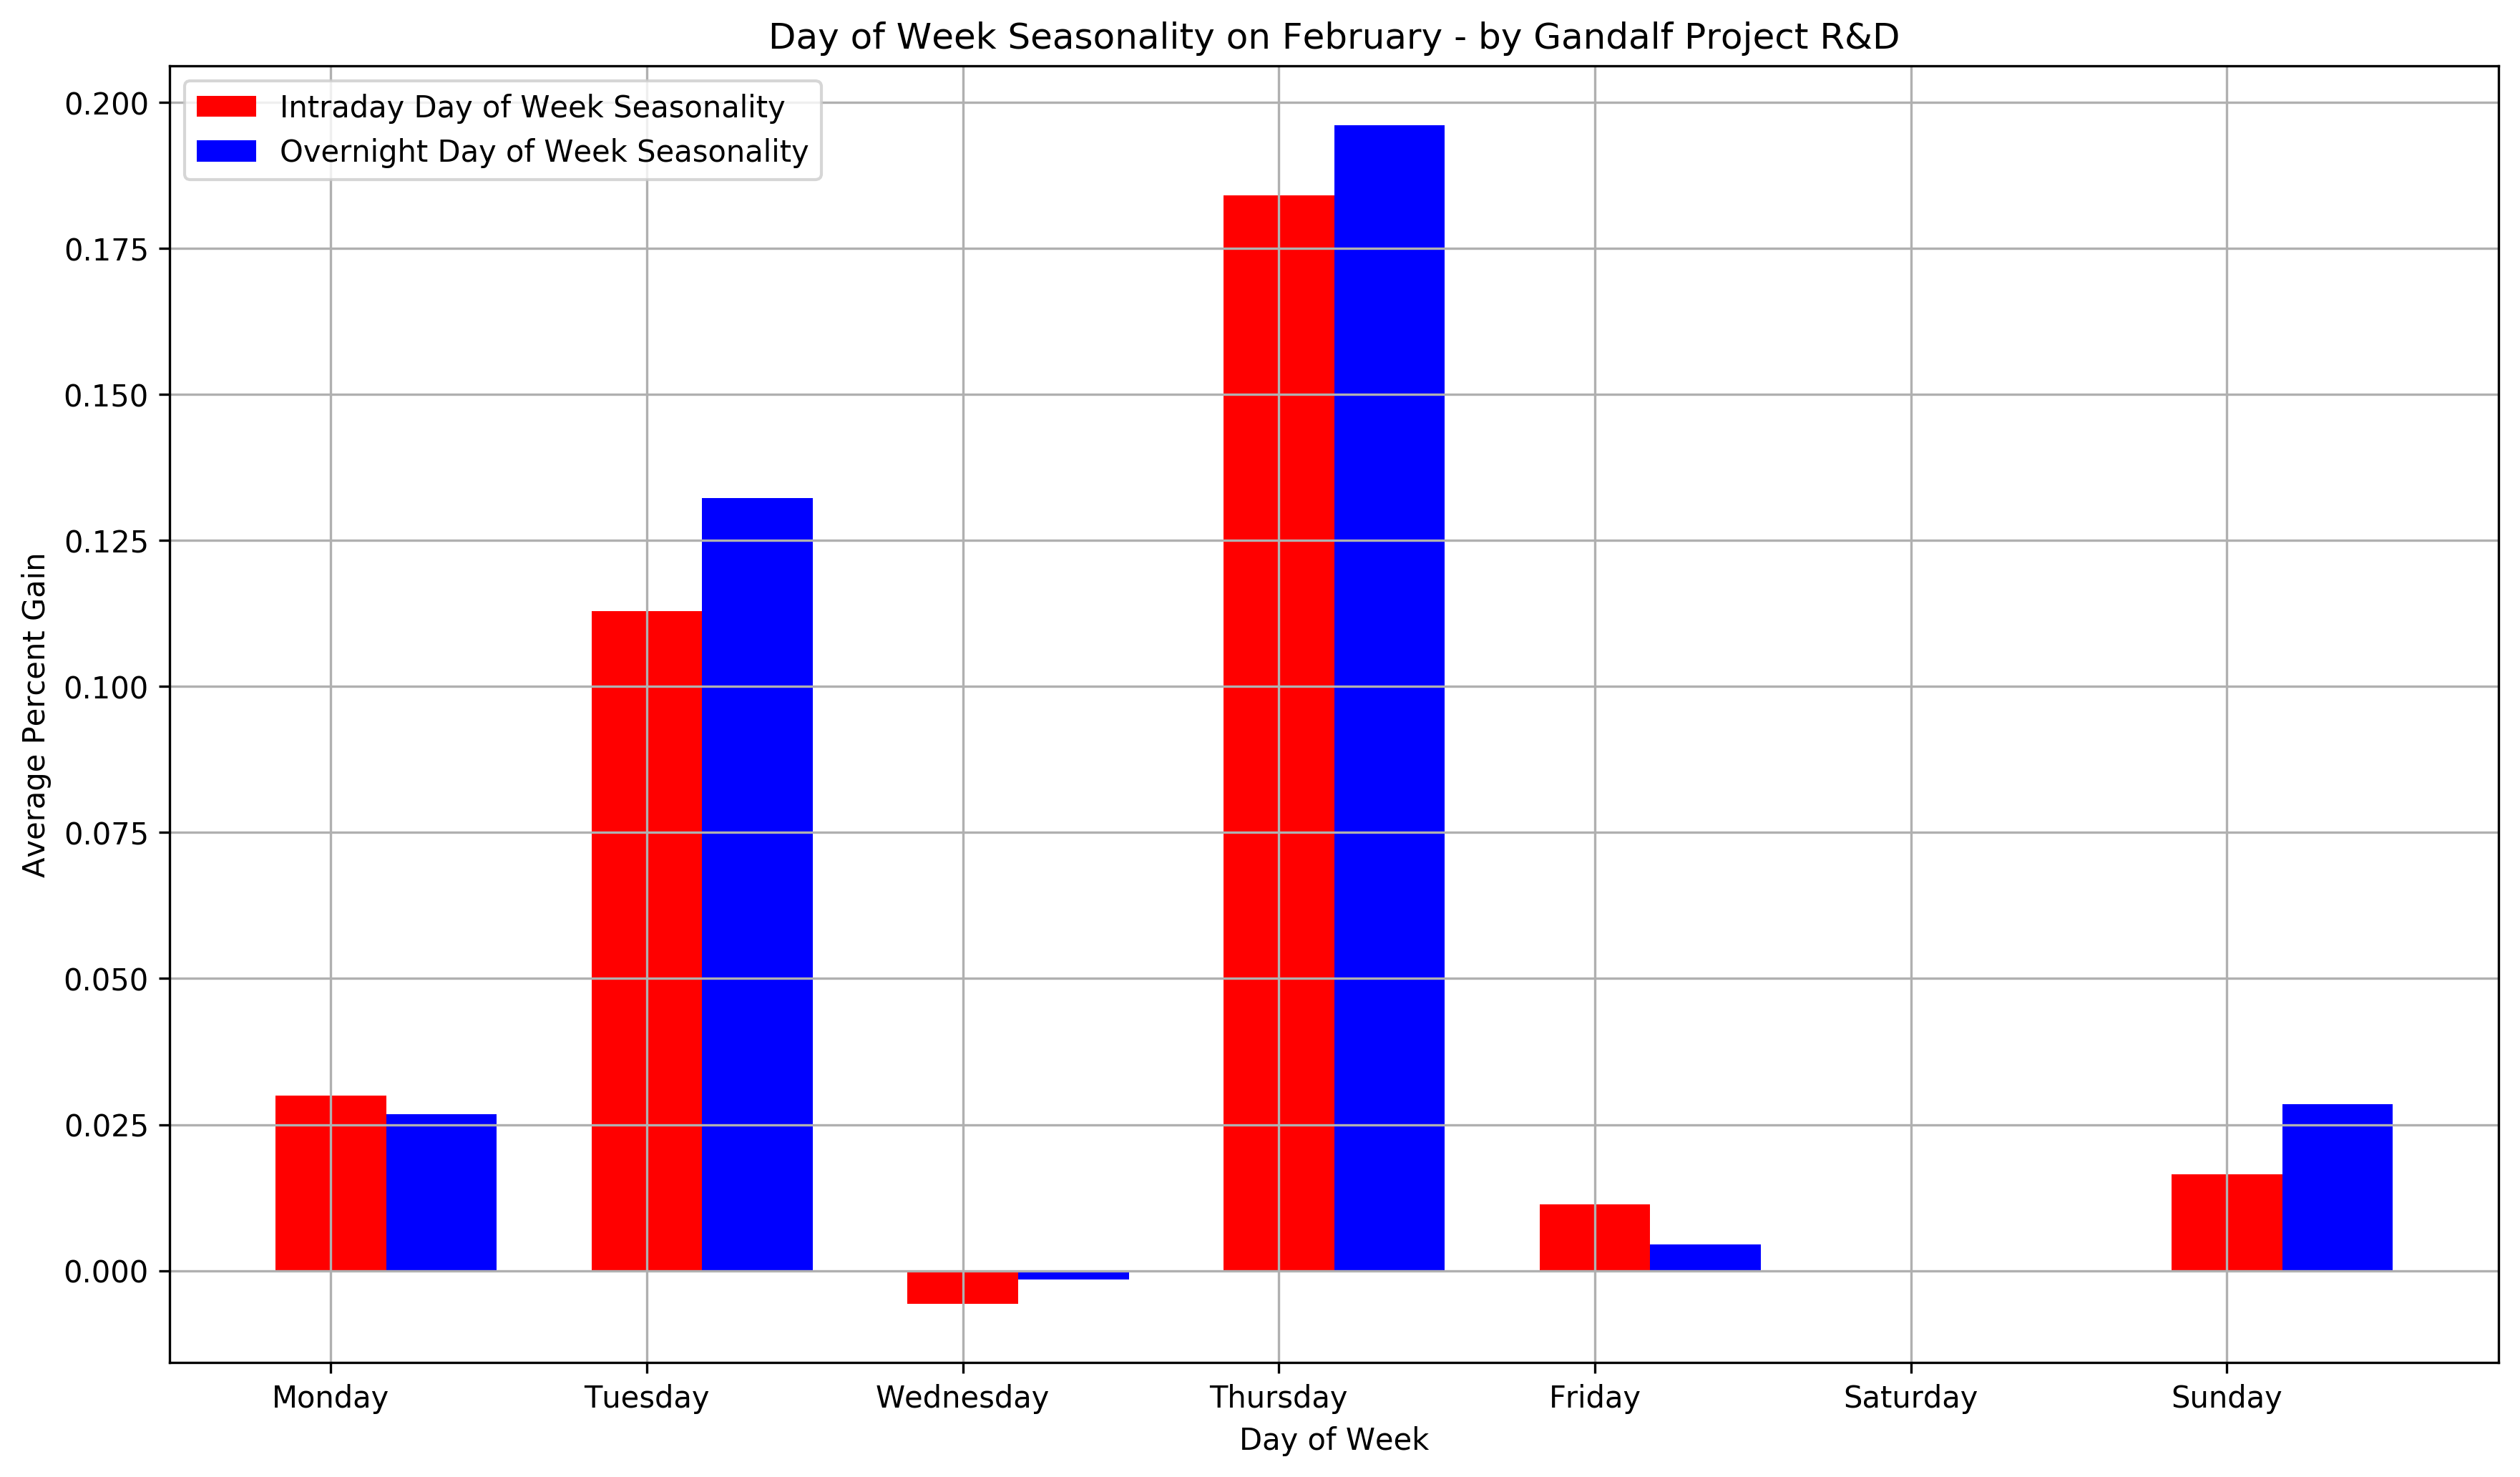

Statistics Intraday:
Monday 0.03 41.51 %
Tuesday 0.1129 55.77 %
Wednesday -0.0057 45.28 %
Thursday 0.184 69.23 %
Friday 0.0113 54.72 %
Sunday 0.0165 57.69 %

Statistics Overnight:
Monday 0.0268 41.51 %
Tuesday 0.1323 55.77 %
Wednesday -0.0015 47.17 %
Thursday 0.1962 71.15 %
Friday 0.0045 54.72 %
Sunday 0.0285 63.46 %



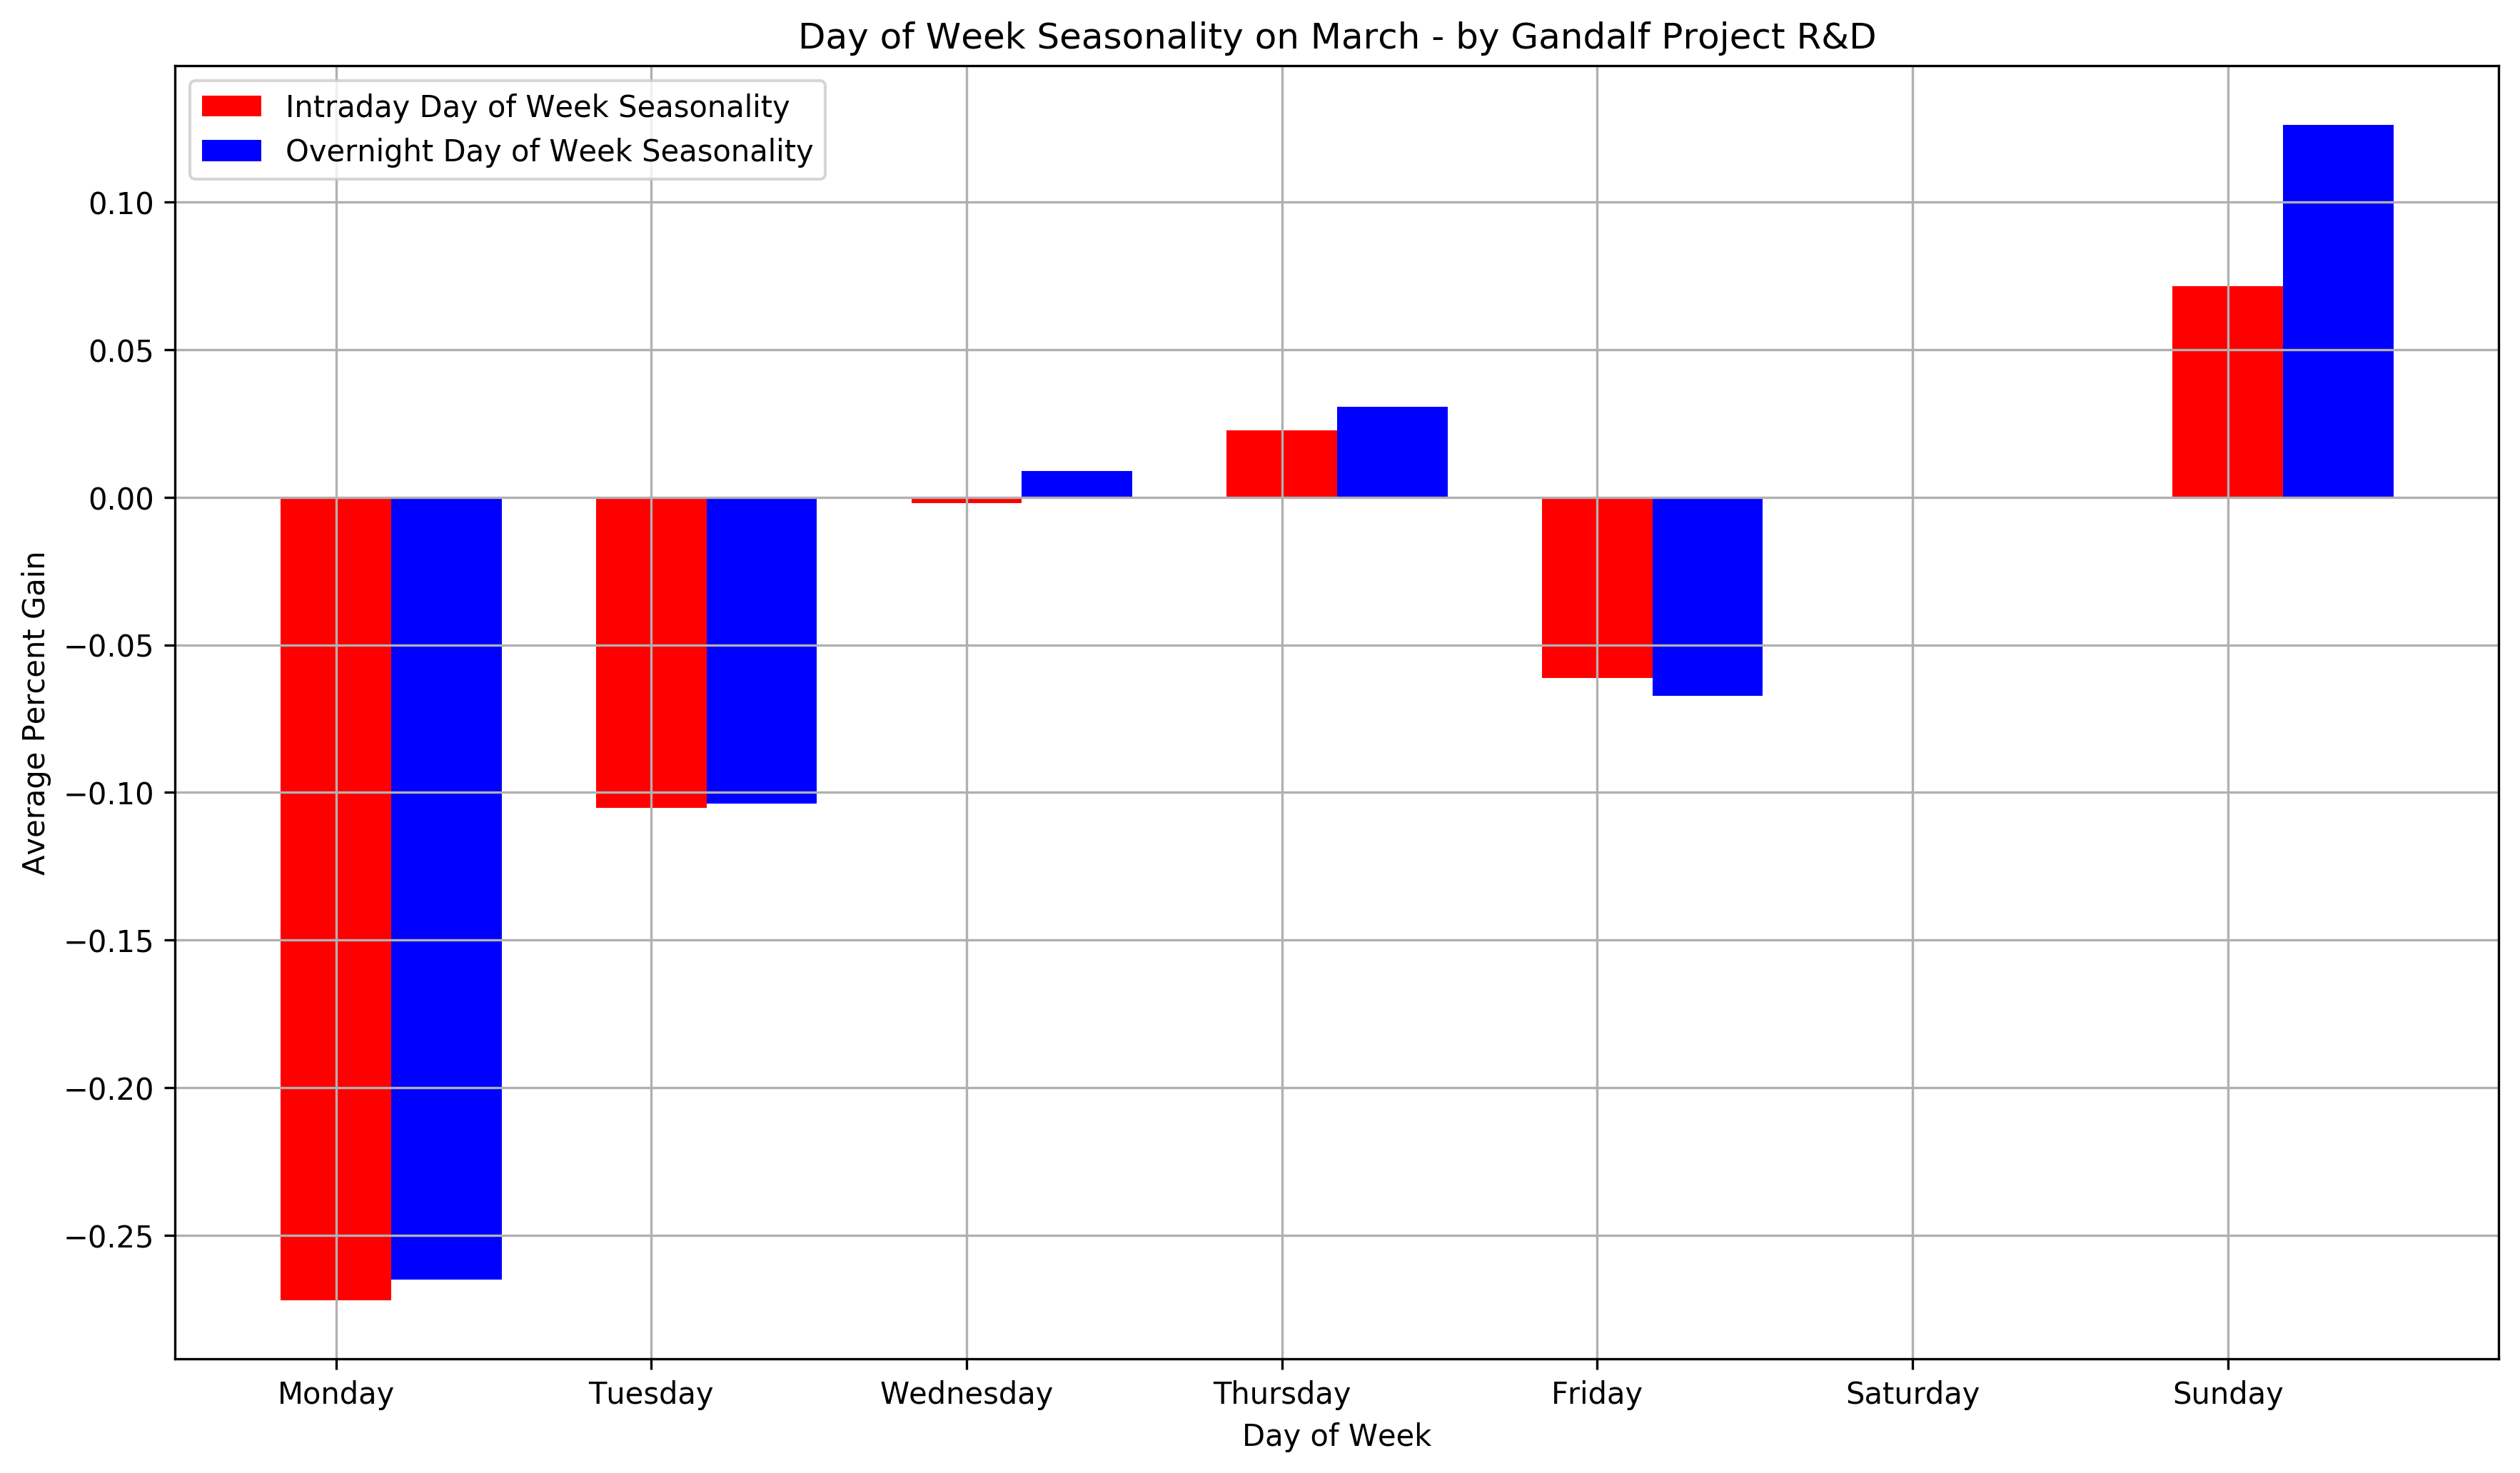

Statistics Intraday:
Monday -0.2719 59.65 %
Tuesday -0.1051 59.65 %
Wednesday -0.002 50.0 %
Thursday 0.0228 48.28 %
Friday -0.0613 42.59 %
Sunday 0.0714 55.17 %

Statistics Overnight:
Monday -0.2651 61.4 %
Tuesday -0.1039 63.16 %
Wednesday 0.0089 50.0 %
Thursday 0.0305 48.28 %
Friday -0.0672 42.59 %
Sunday 0.1262 62.07 %



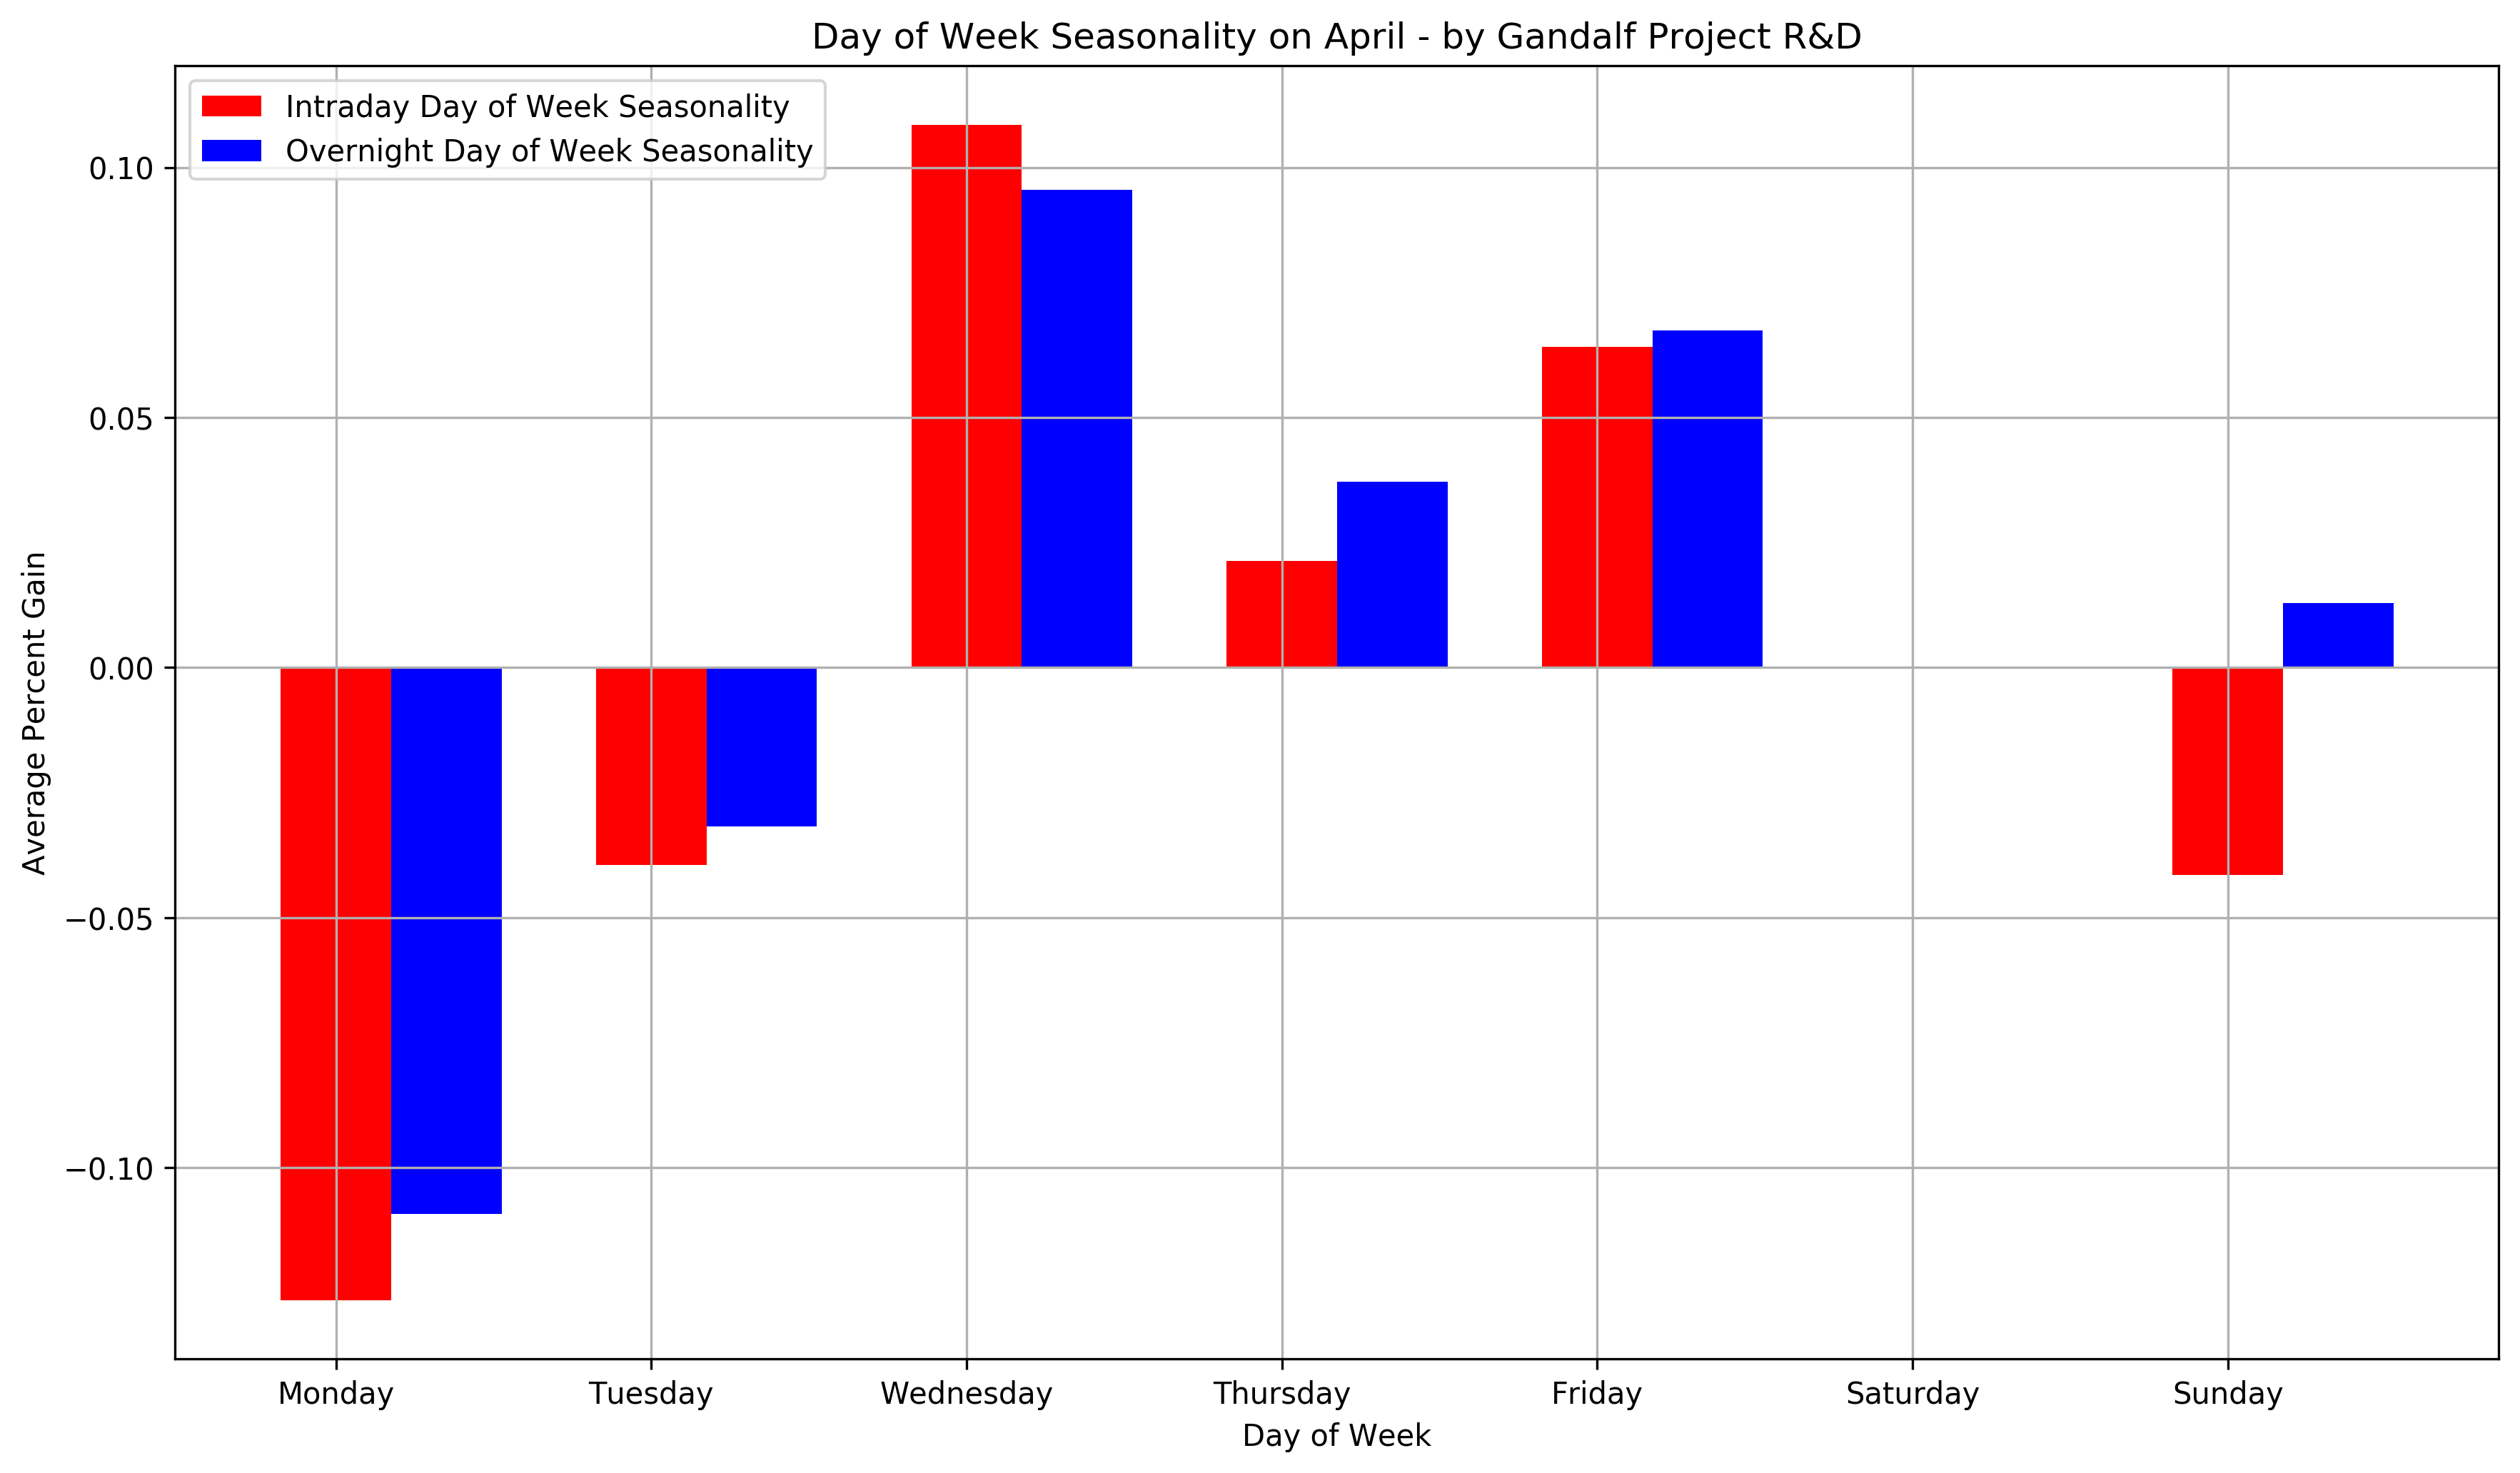

Statistics Intraday:
Monday -0.1265 56.14 %
Tuesday -0.0395 48.21 %
Wednesday 0.1086 58.93 %
Thursday 0.0213 52.73 %
Friday 0.0641 65.22 %
Sunday -0.0414 51.79 %

Statistics Overnight:
Monday -0.1093 54.39 %
Tuesday -0.0318 46.43 %
Wednesday 0.0955 60.71 %
Thursday 0.0371 50.91 %
Friday 0.0674 63.04 %
Sunday 0.0129 53.57 %



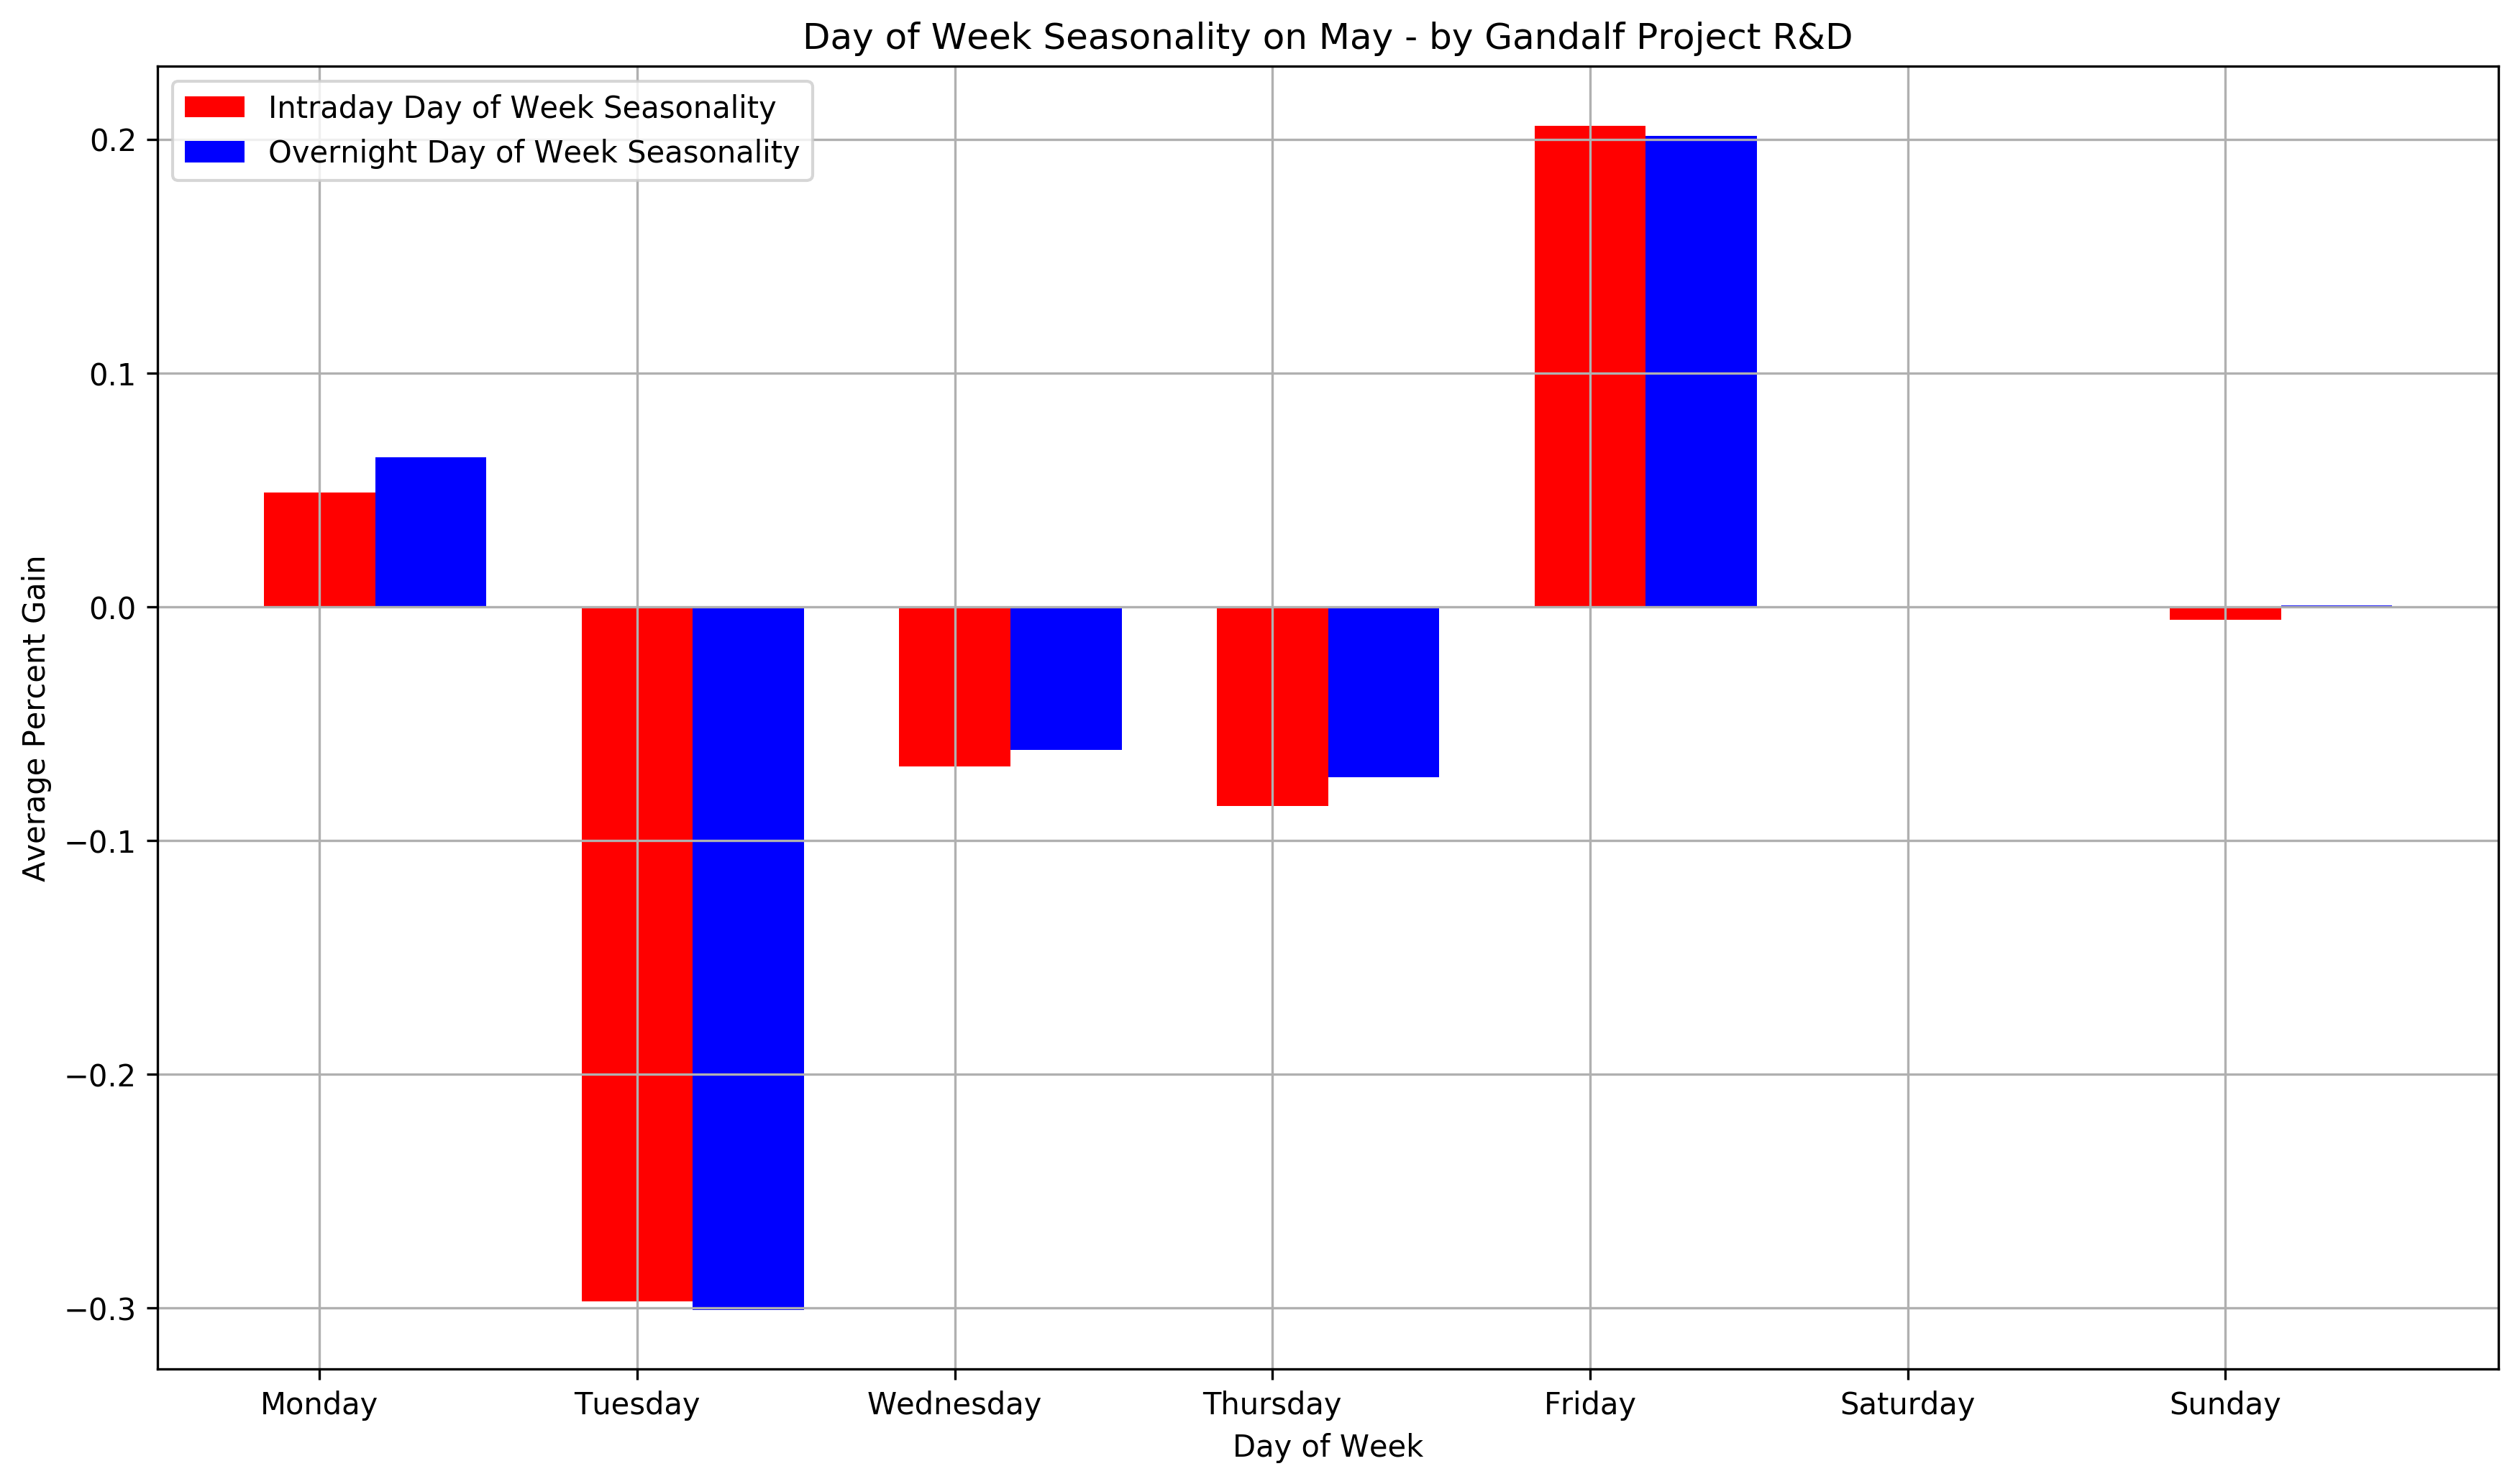

Statistics Intraday:
Monday 0.0488 53.57 %
Tuesday -0.2972 65.52 %
Wednesday -0.0683 53.45 %
Thursday -0.0853 61.02 %
Friday 0.2059 65.52 %
Sunday -0.0056 45.61 %

Statistics Overnight:
Monday 0.0639 53.57 %
Tuesday -0.3009 65.52 %
Wednesday -0.0612 53.45 %
Thursday -0.0729 59.32 %
Friday 0.2014 65.52 %
Sunday 0.0005 50.88 %



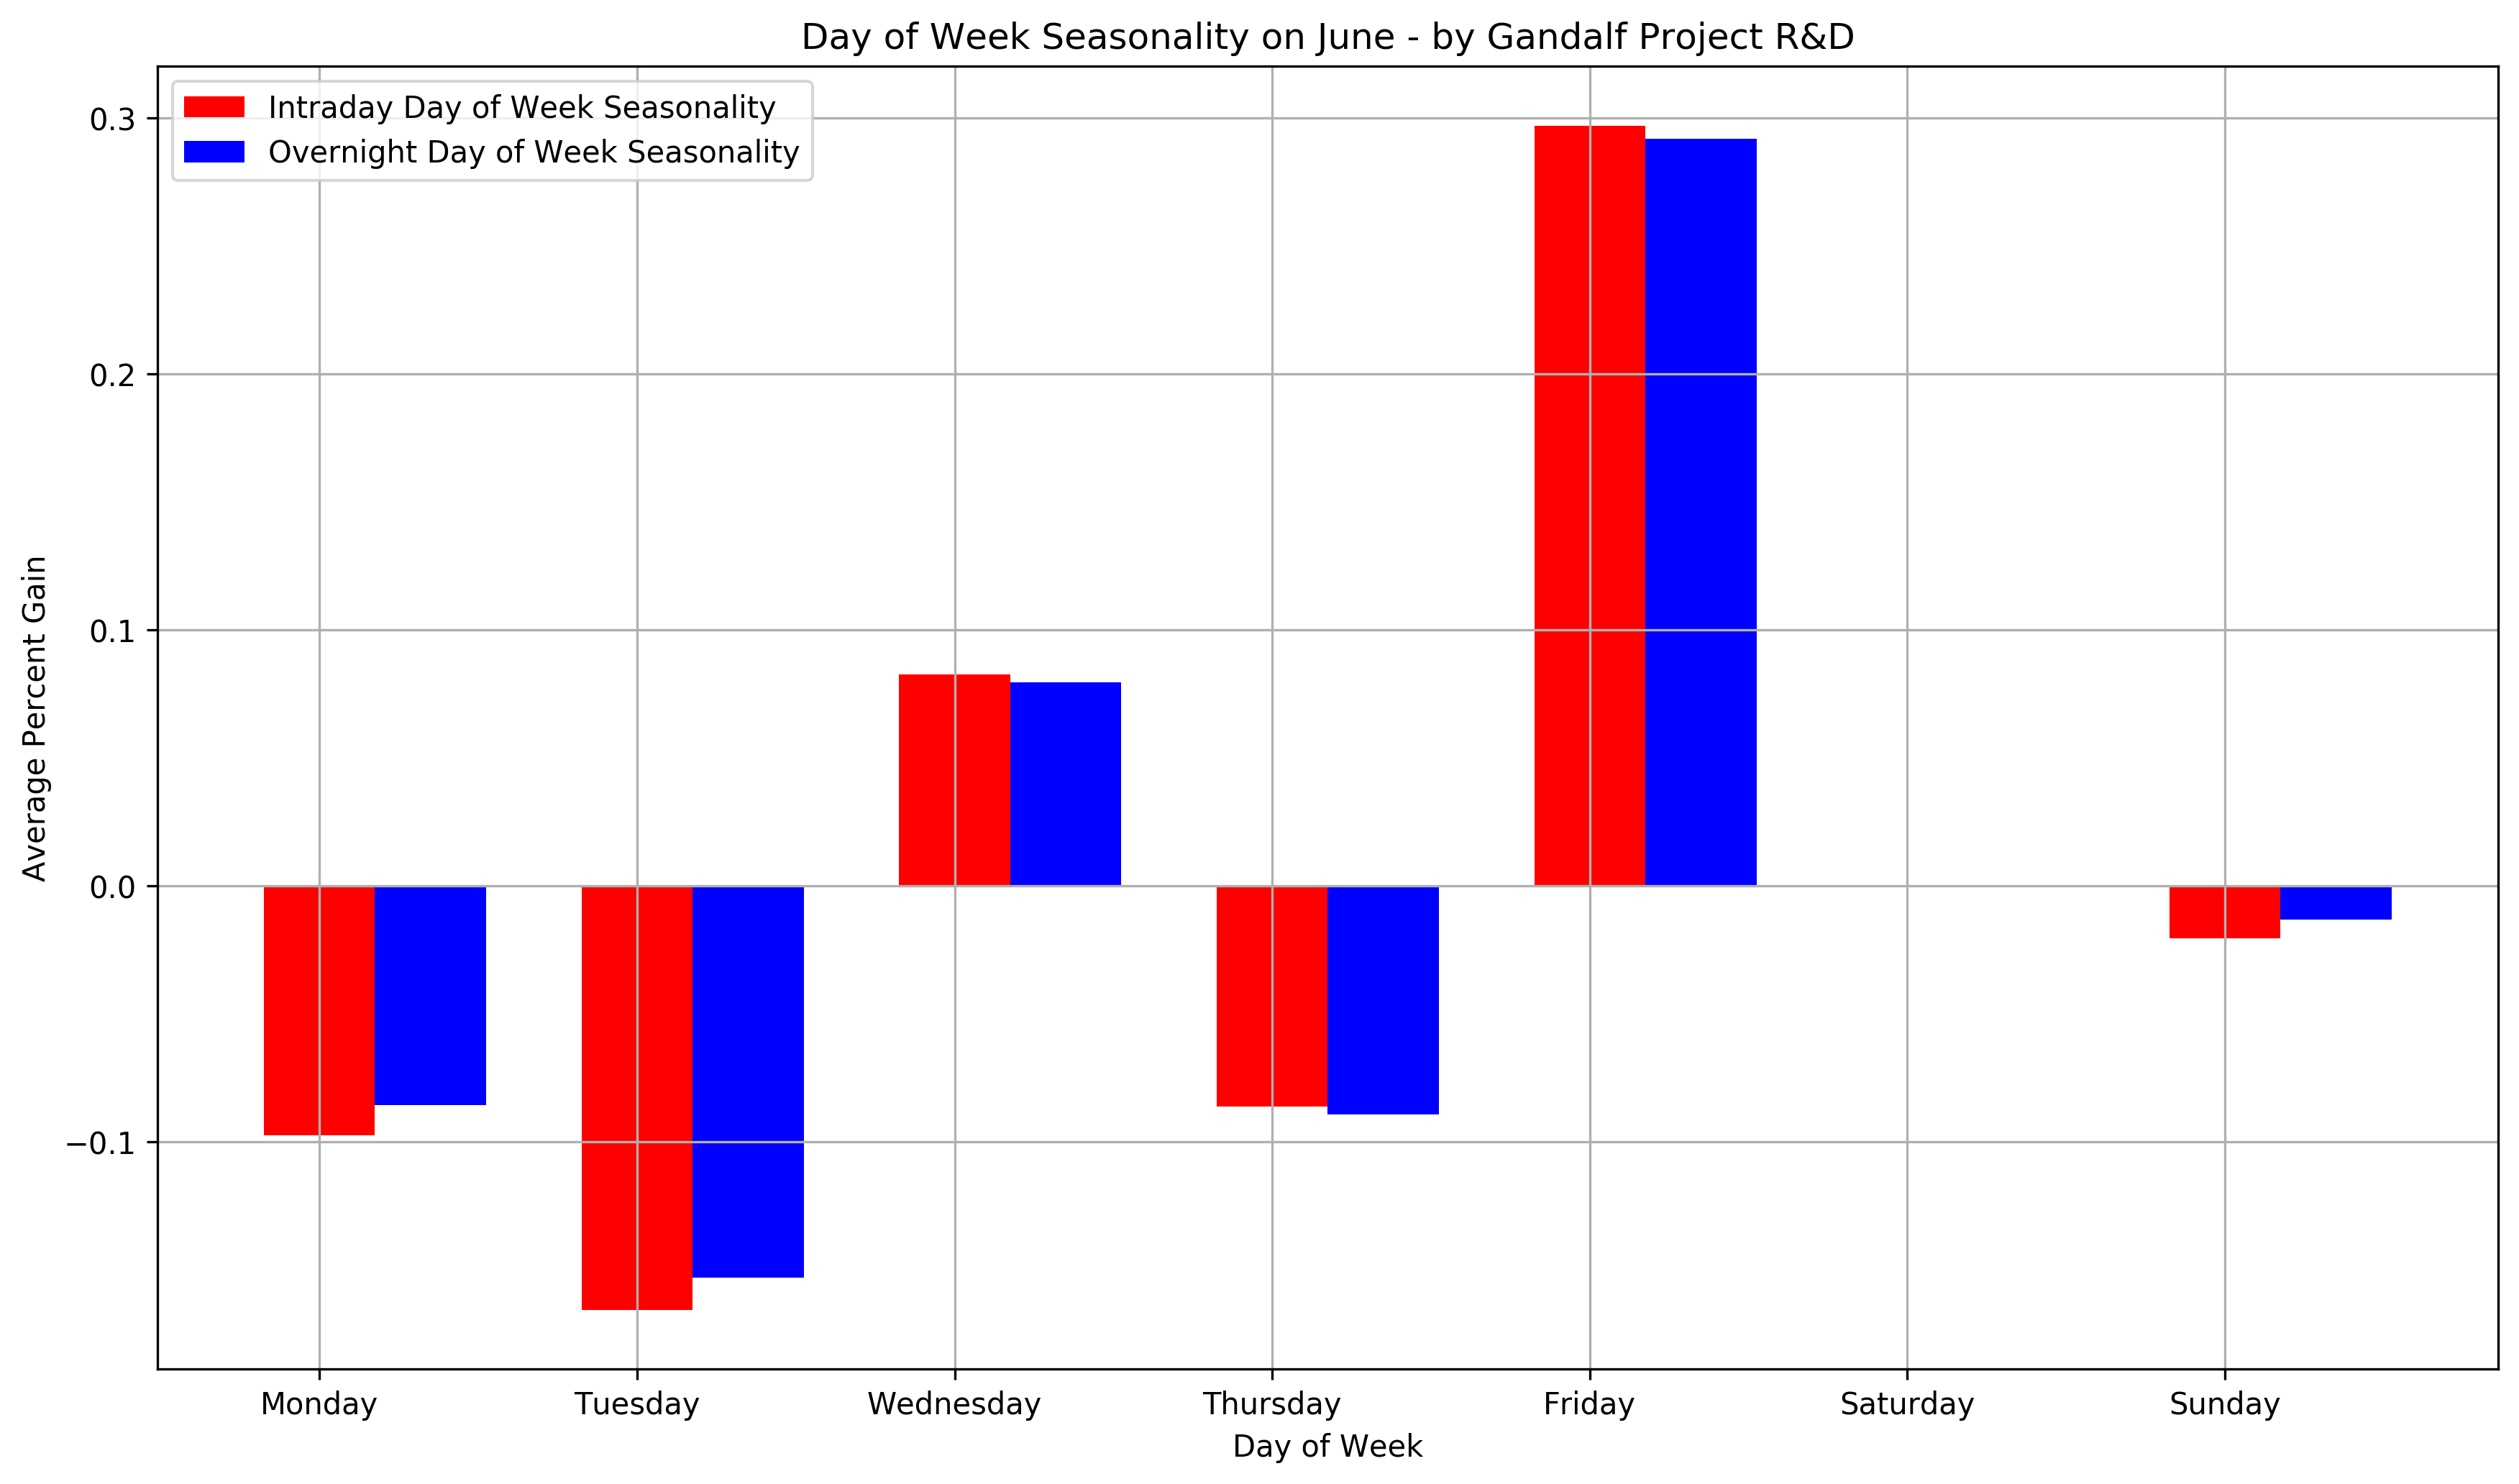

Statistics Intraday:
Monday -0.0975 57.14 %
Tuesday -0.1656 45.45 %
Wednesday 0.0827 47.27 %
Thursday -0.0862 50.91 %
Friday 0.2971 64.29 %
Sunday -0.0205 53.57 %

Statistics Overnight:
Monday -0.0855 55.36 %
Tuesday -0.1529 45.45 %
Wednesday 0.0796 47.27 %
Thursday -0.0893 49.09 %
Friday 0.292 64.29 %
Sunday -0.0132 50.0 %



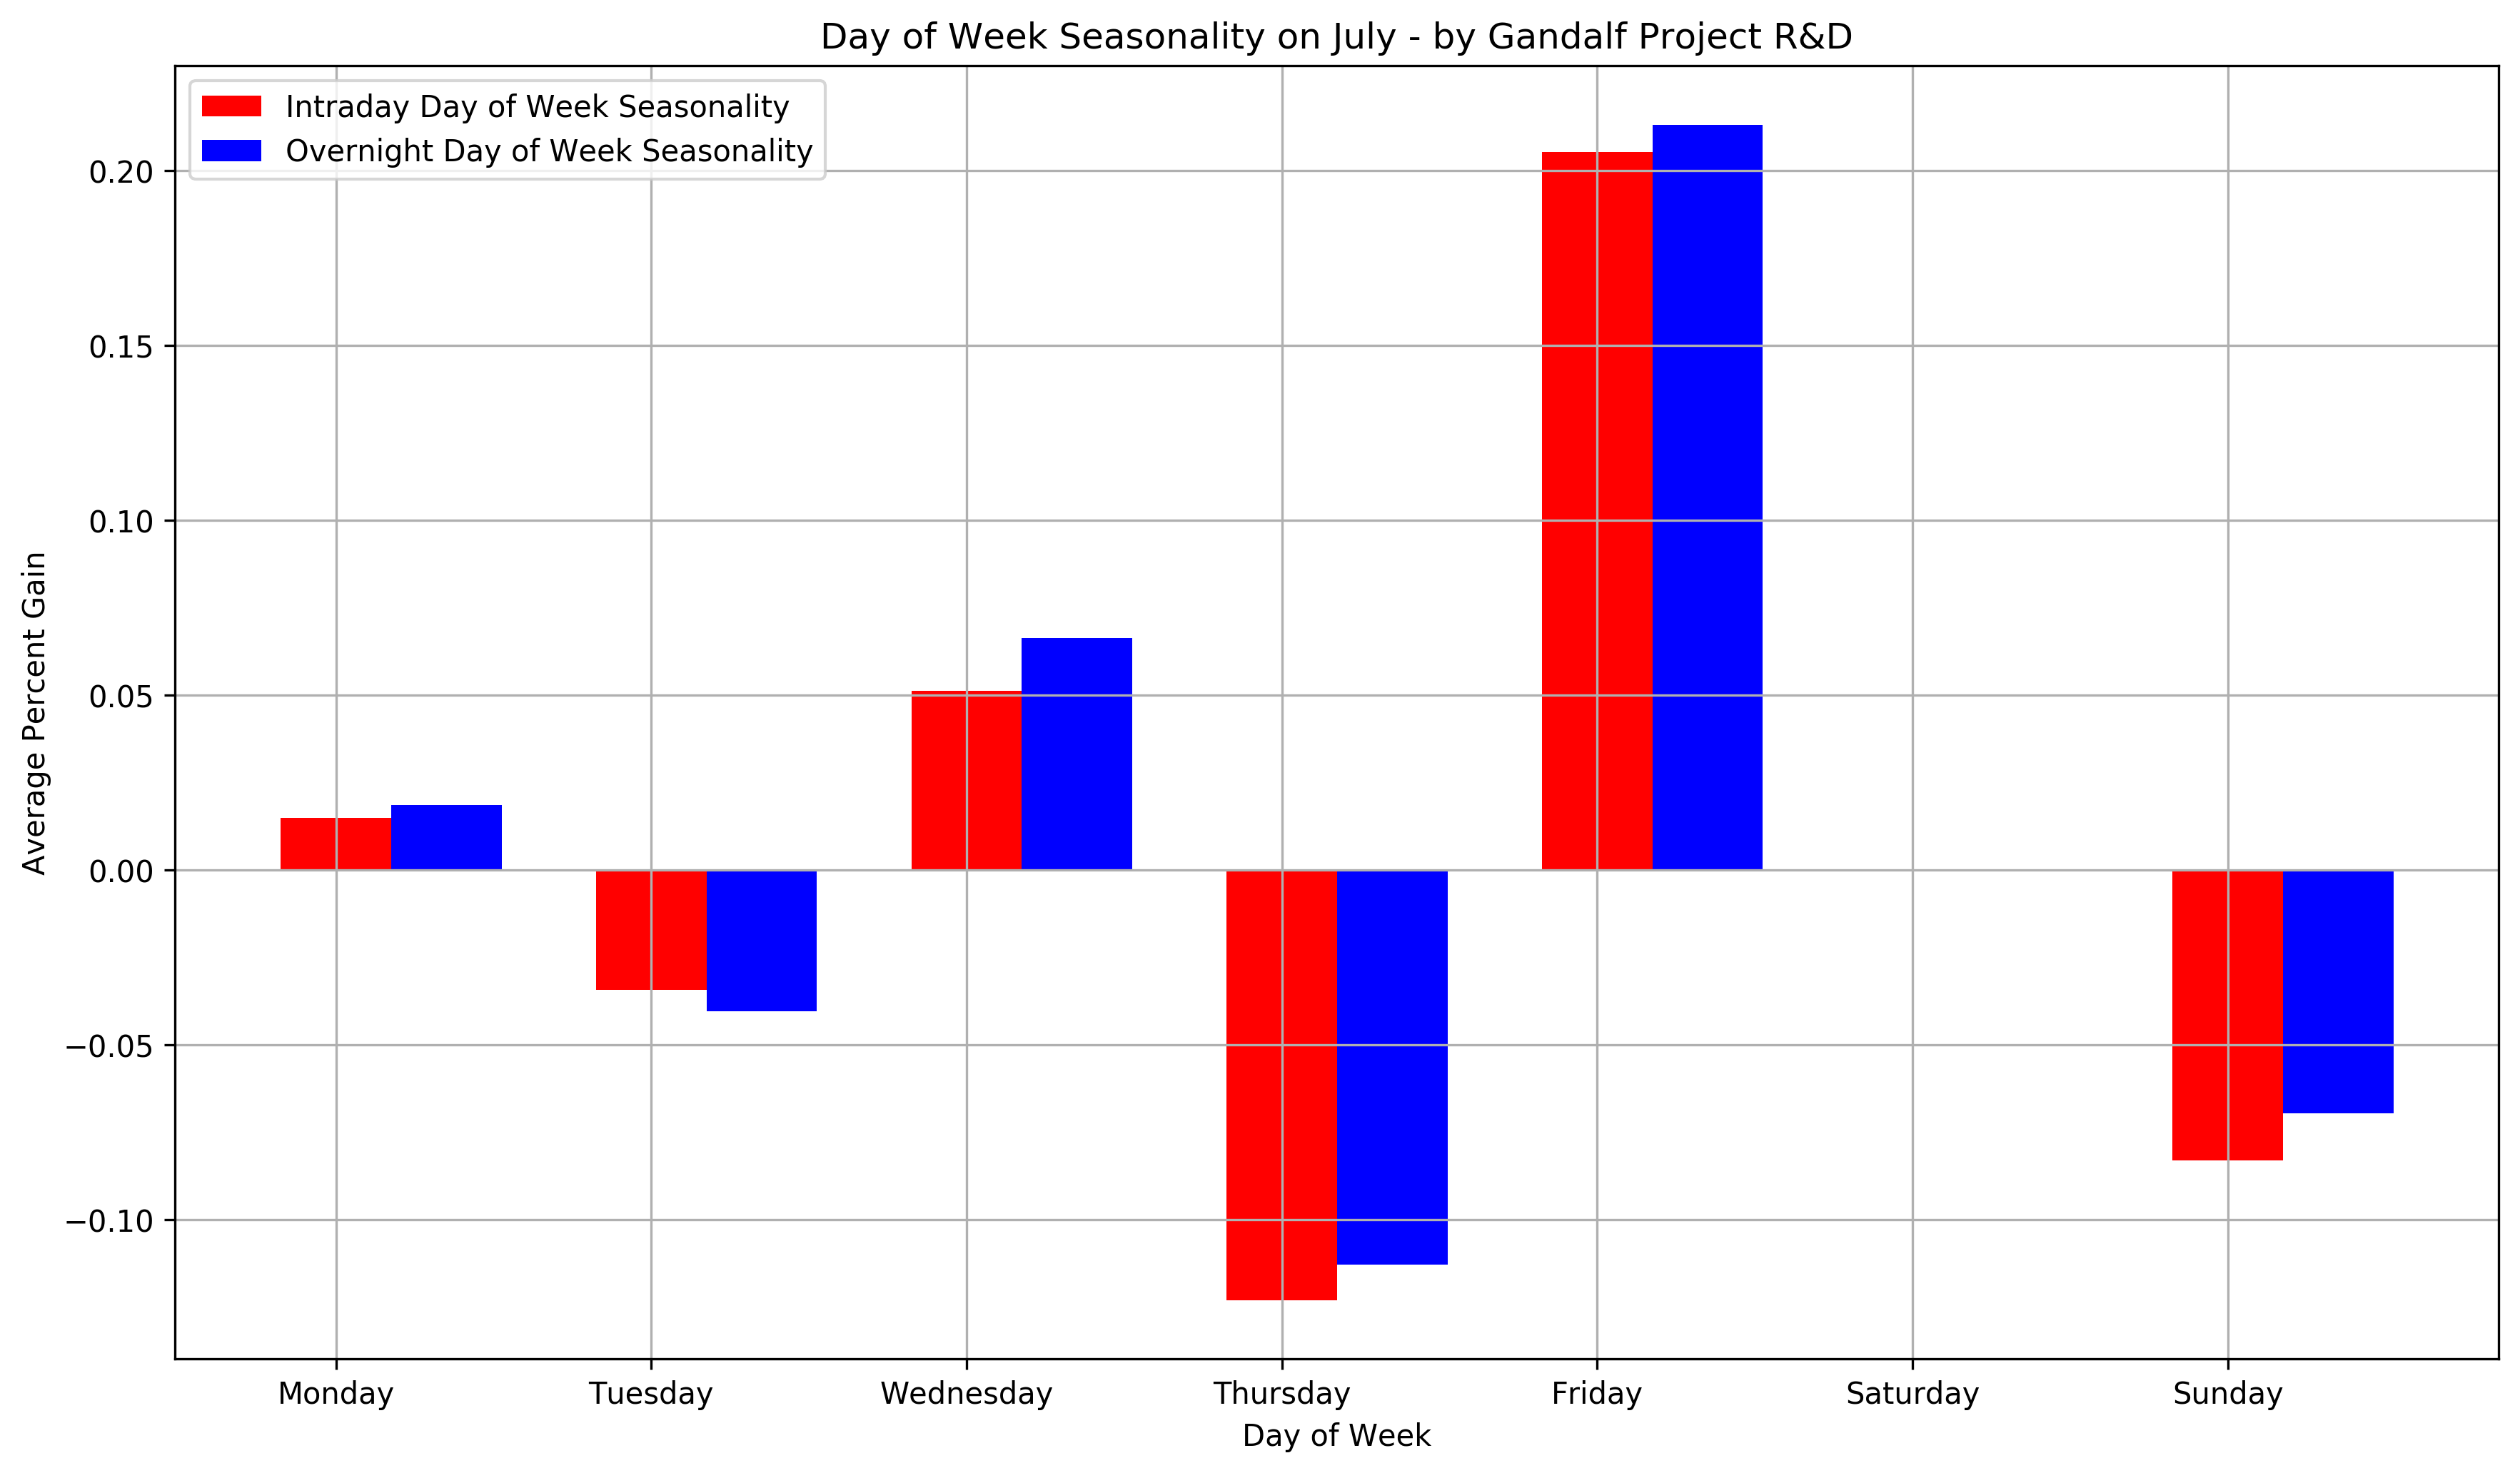

Statistics Intraday:
Monday 0.0148 60.34 %
Tuesday -0.0342 45.76 %
Wednesday 0.0512 48.28 %
Thursday -0.123 61.4 %
Friday 0.2053 66.67 %
Sunday -0.0831 58.62 %

Statistics Overnight:
Monday 0.0186 58.62 %
Tuesday -0.0403 49.15 %
Wednesday 0.0664 51.72 %
Thursday -0.1128 61.4 %
Friday 0.2132 64.91 %
Sunday -0.0695 55.17 %



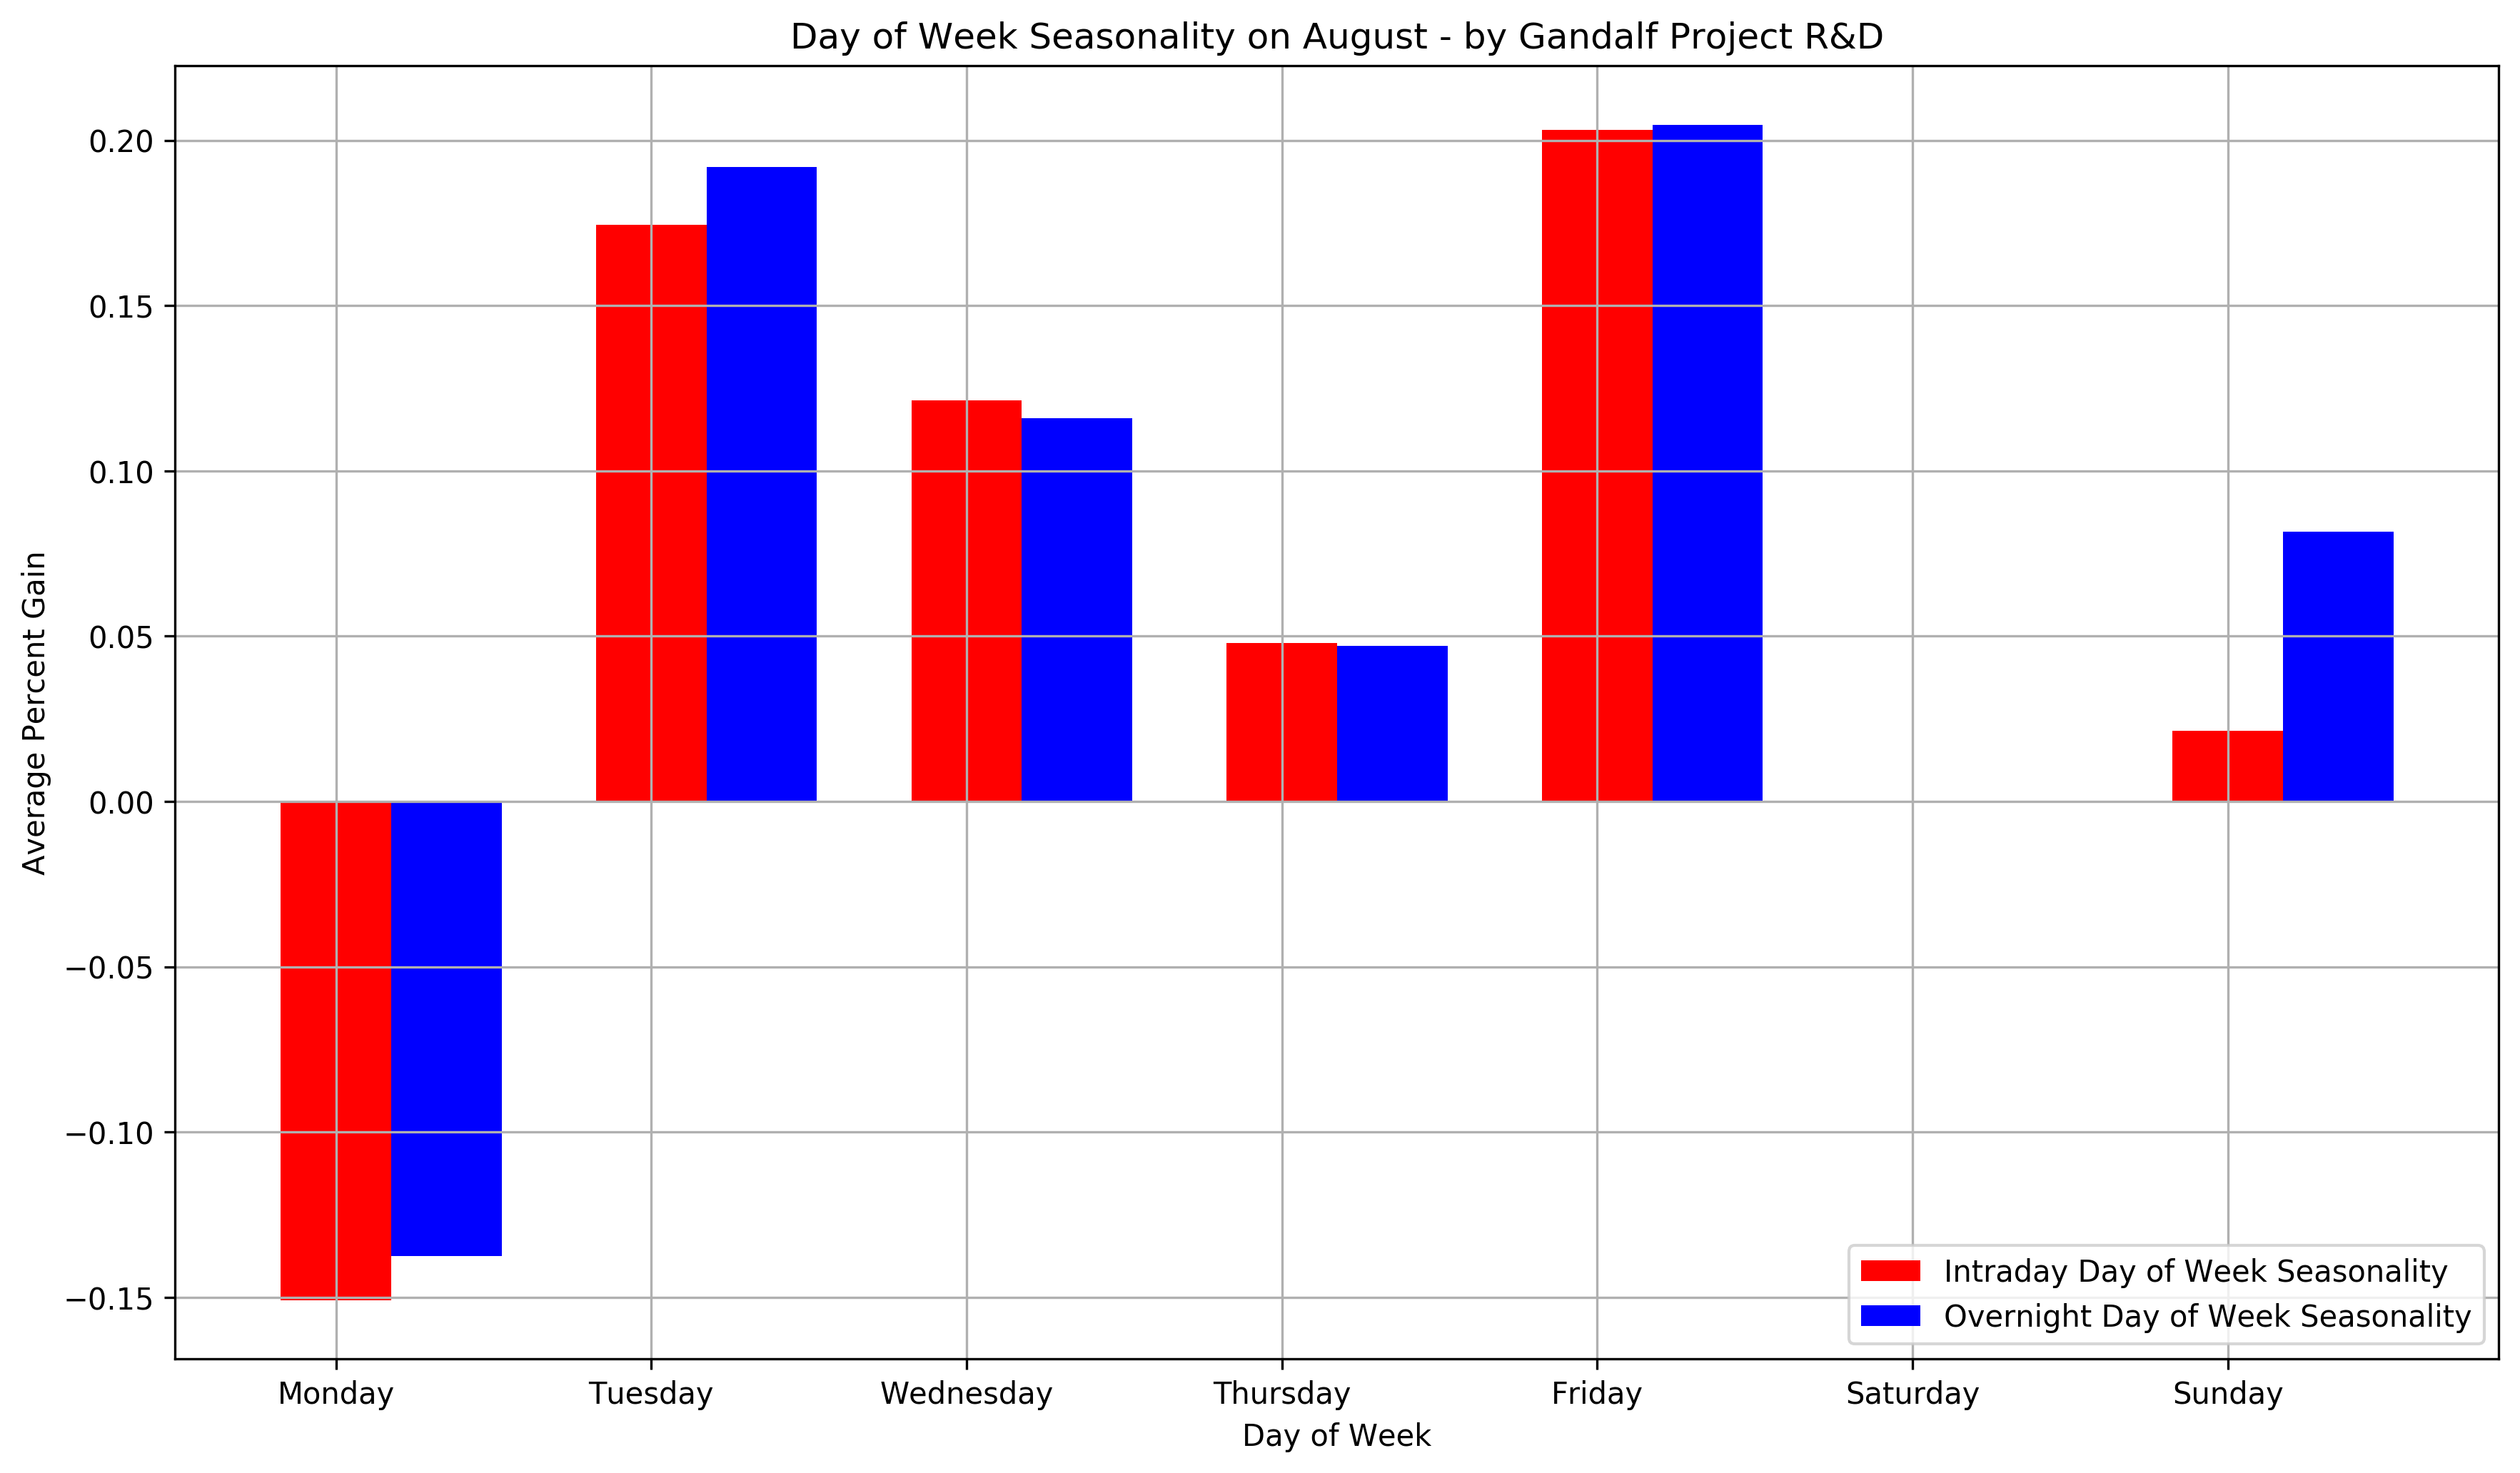

Statistics Intraday:
Monday -0.1509 47.37 %
Tuesday 0.1745 62.5 %
Wednesday 0.1212 58.62 %
Thursday 0.0479 48.28 %
Friday 0.2032 55.93 %
Sunday 0.0214 52.63 %

Statistics Overnight:
Monday -0.1375 49.12 %
Tuesday 0.192 64.29 %
Wednesday 0.1159 58.62 %
Thursday 0.0471 50.0 %
Friday 0.2047 57.63 %
Sunday 0.0816 52.63 %



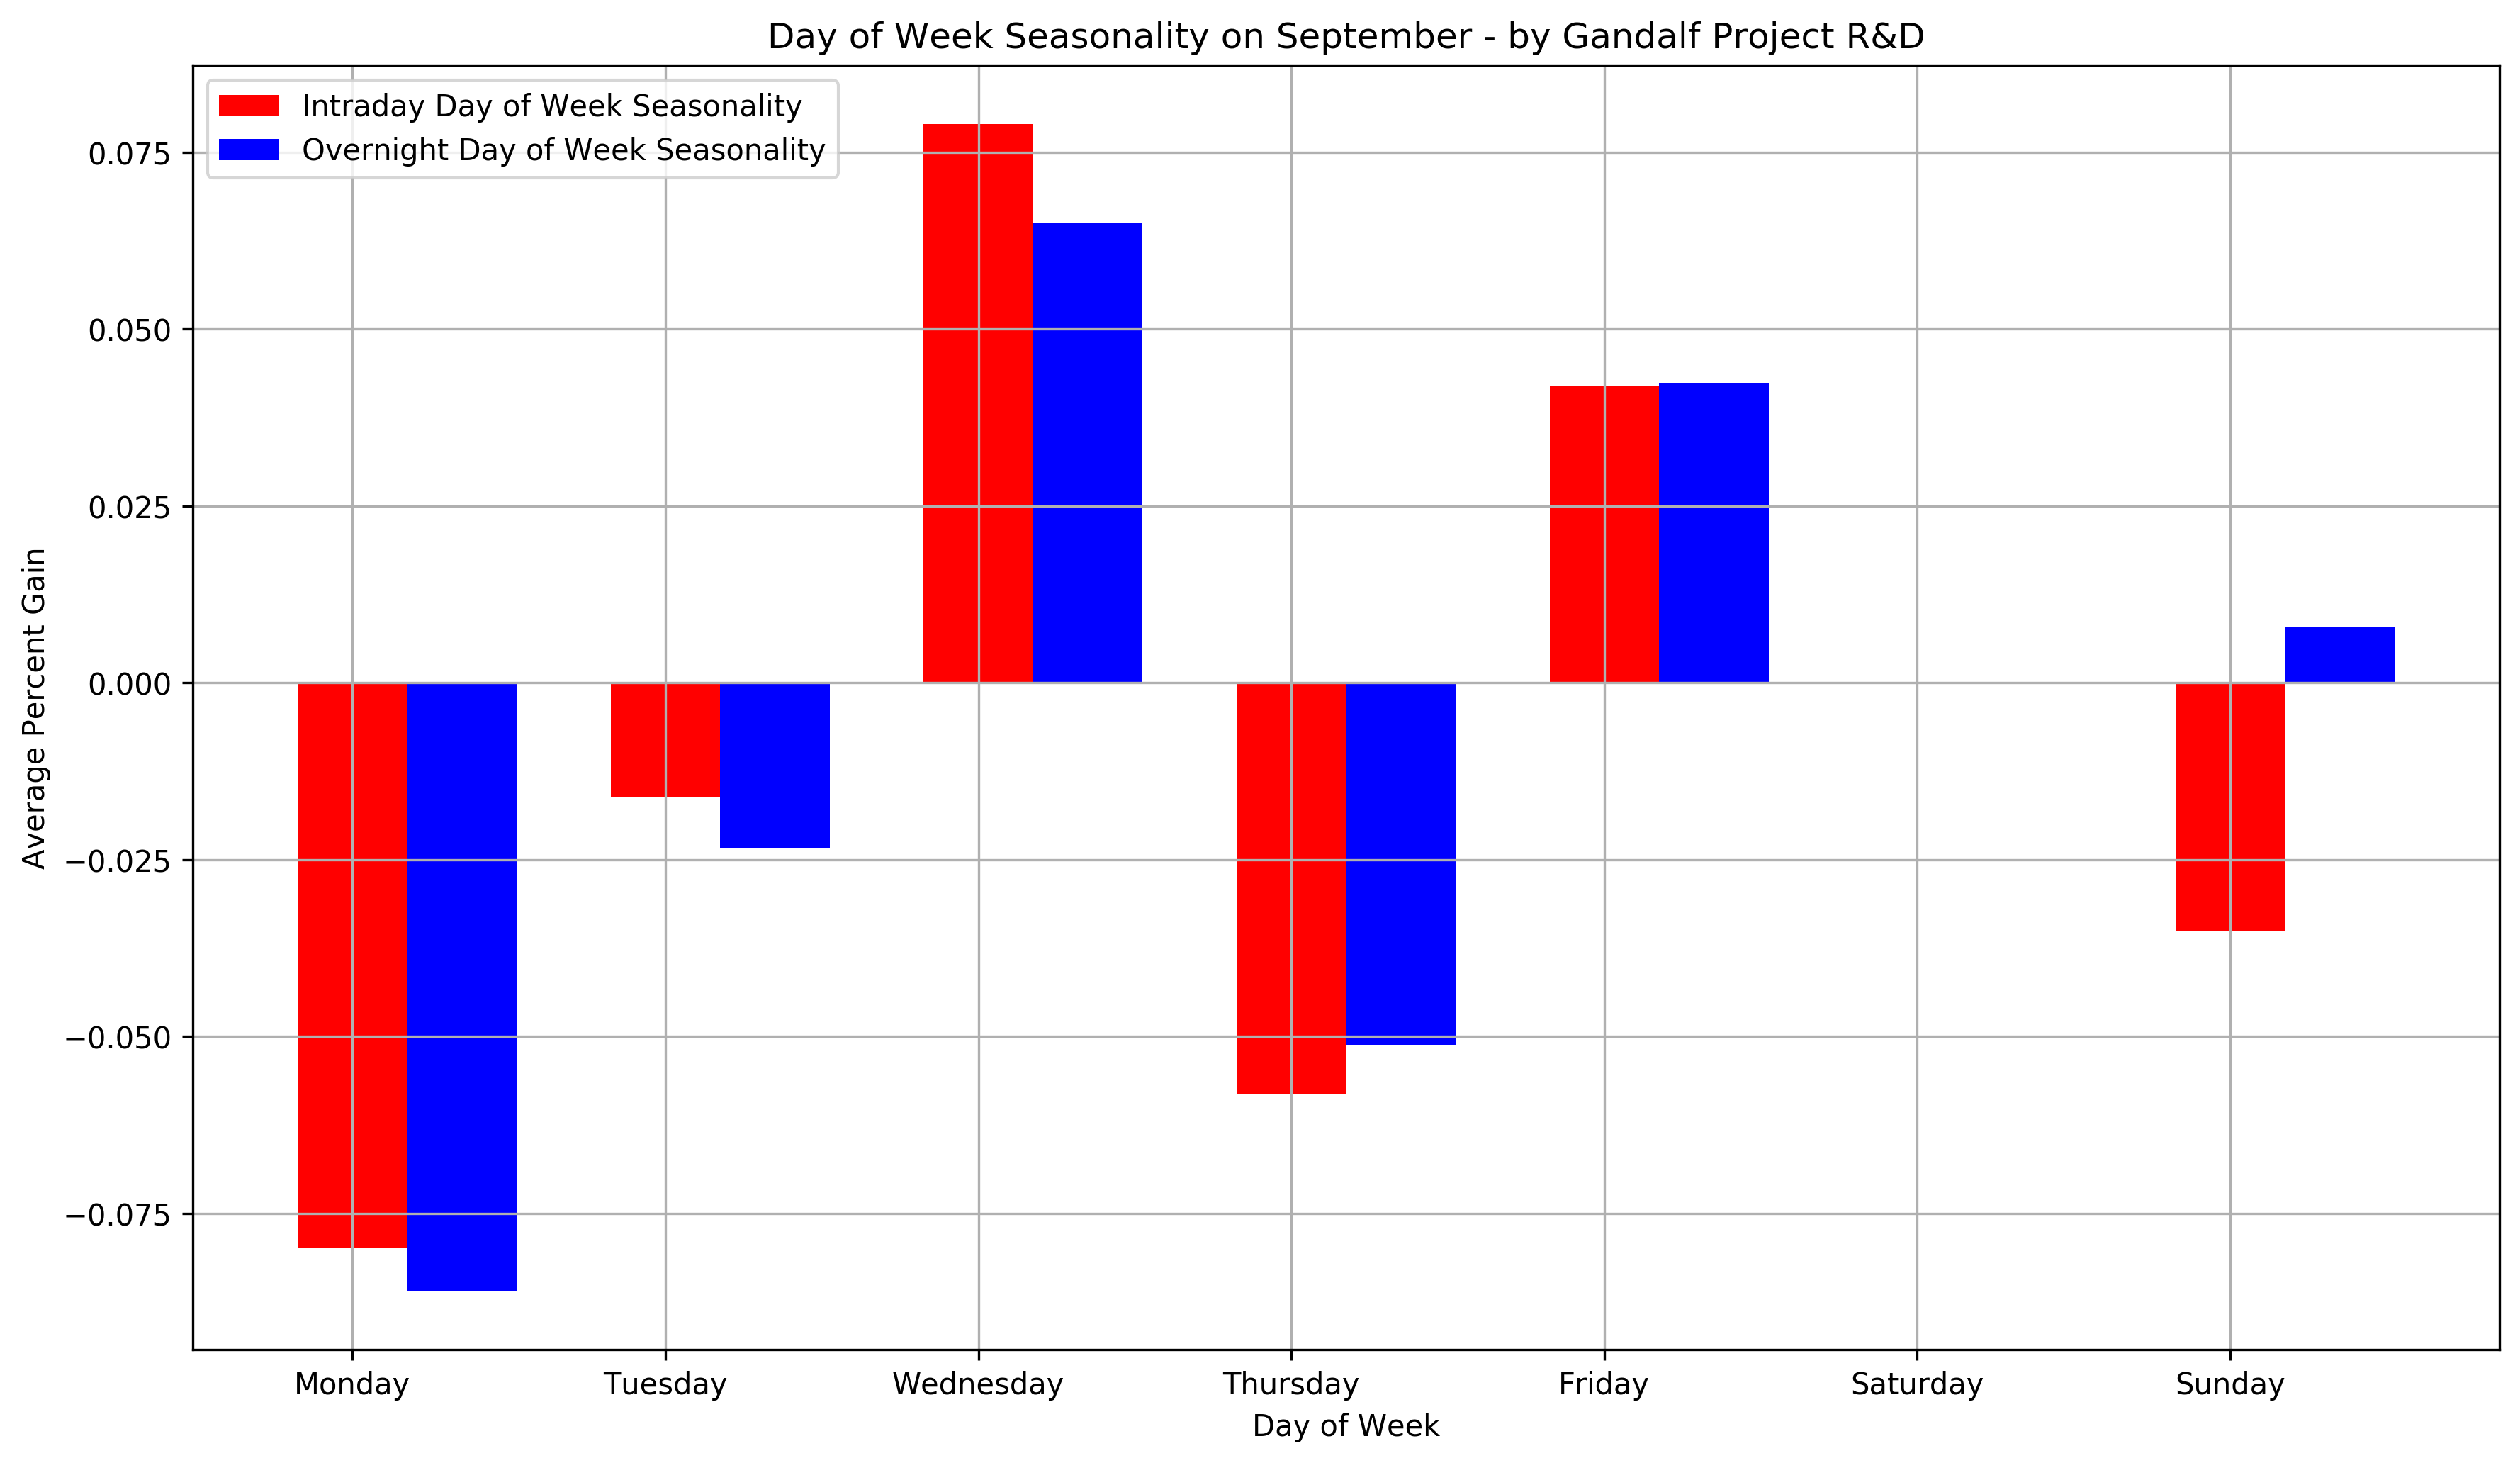

Statistics Intraday:
Monday -0.0798 50.94 %
Tuesday -0.0161 38.89 %
Wednesday 0.0791 43.4 %
Thursday -0.0581 47.17 %
Friday 0.0421 41.51 %
Sunday -0.035 61.11 %

Statistics Overnight:
Monday -0.086 50.94 %
Tuesday -0.0233 40.74 %
Wednesday 0.0651 39.62 %
Thursday -0.0511 47.17 %
Friday 0.0425 41.51 %
Sunday 0.008 42.59 %



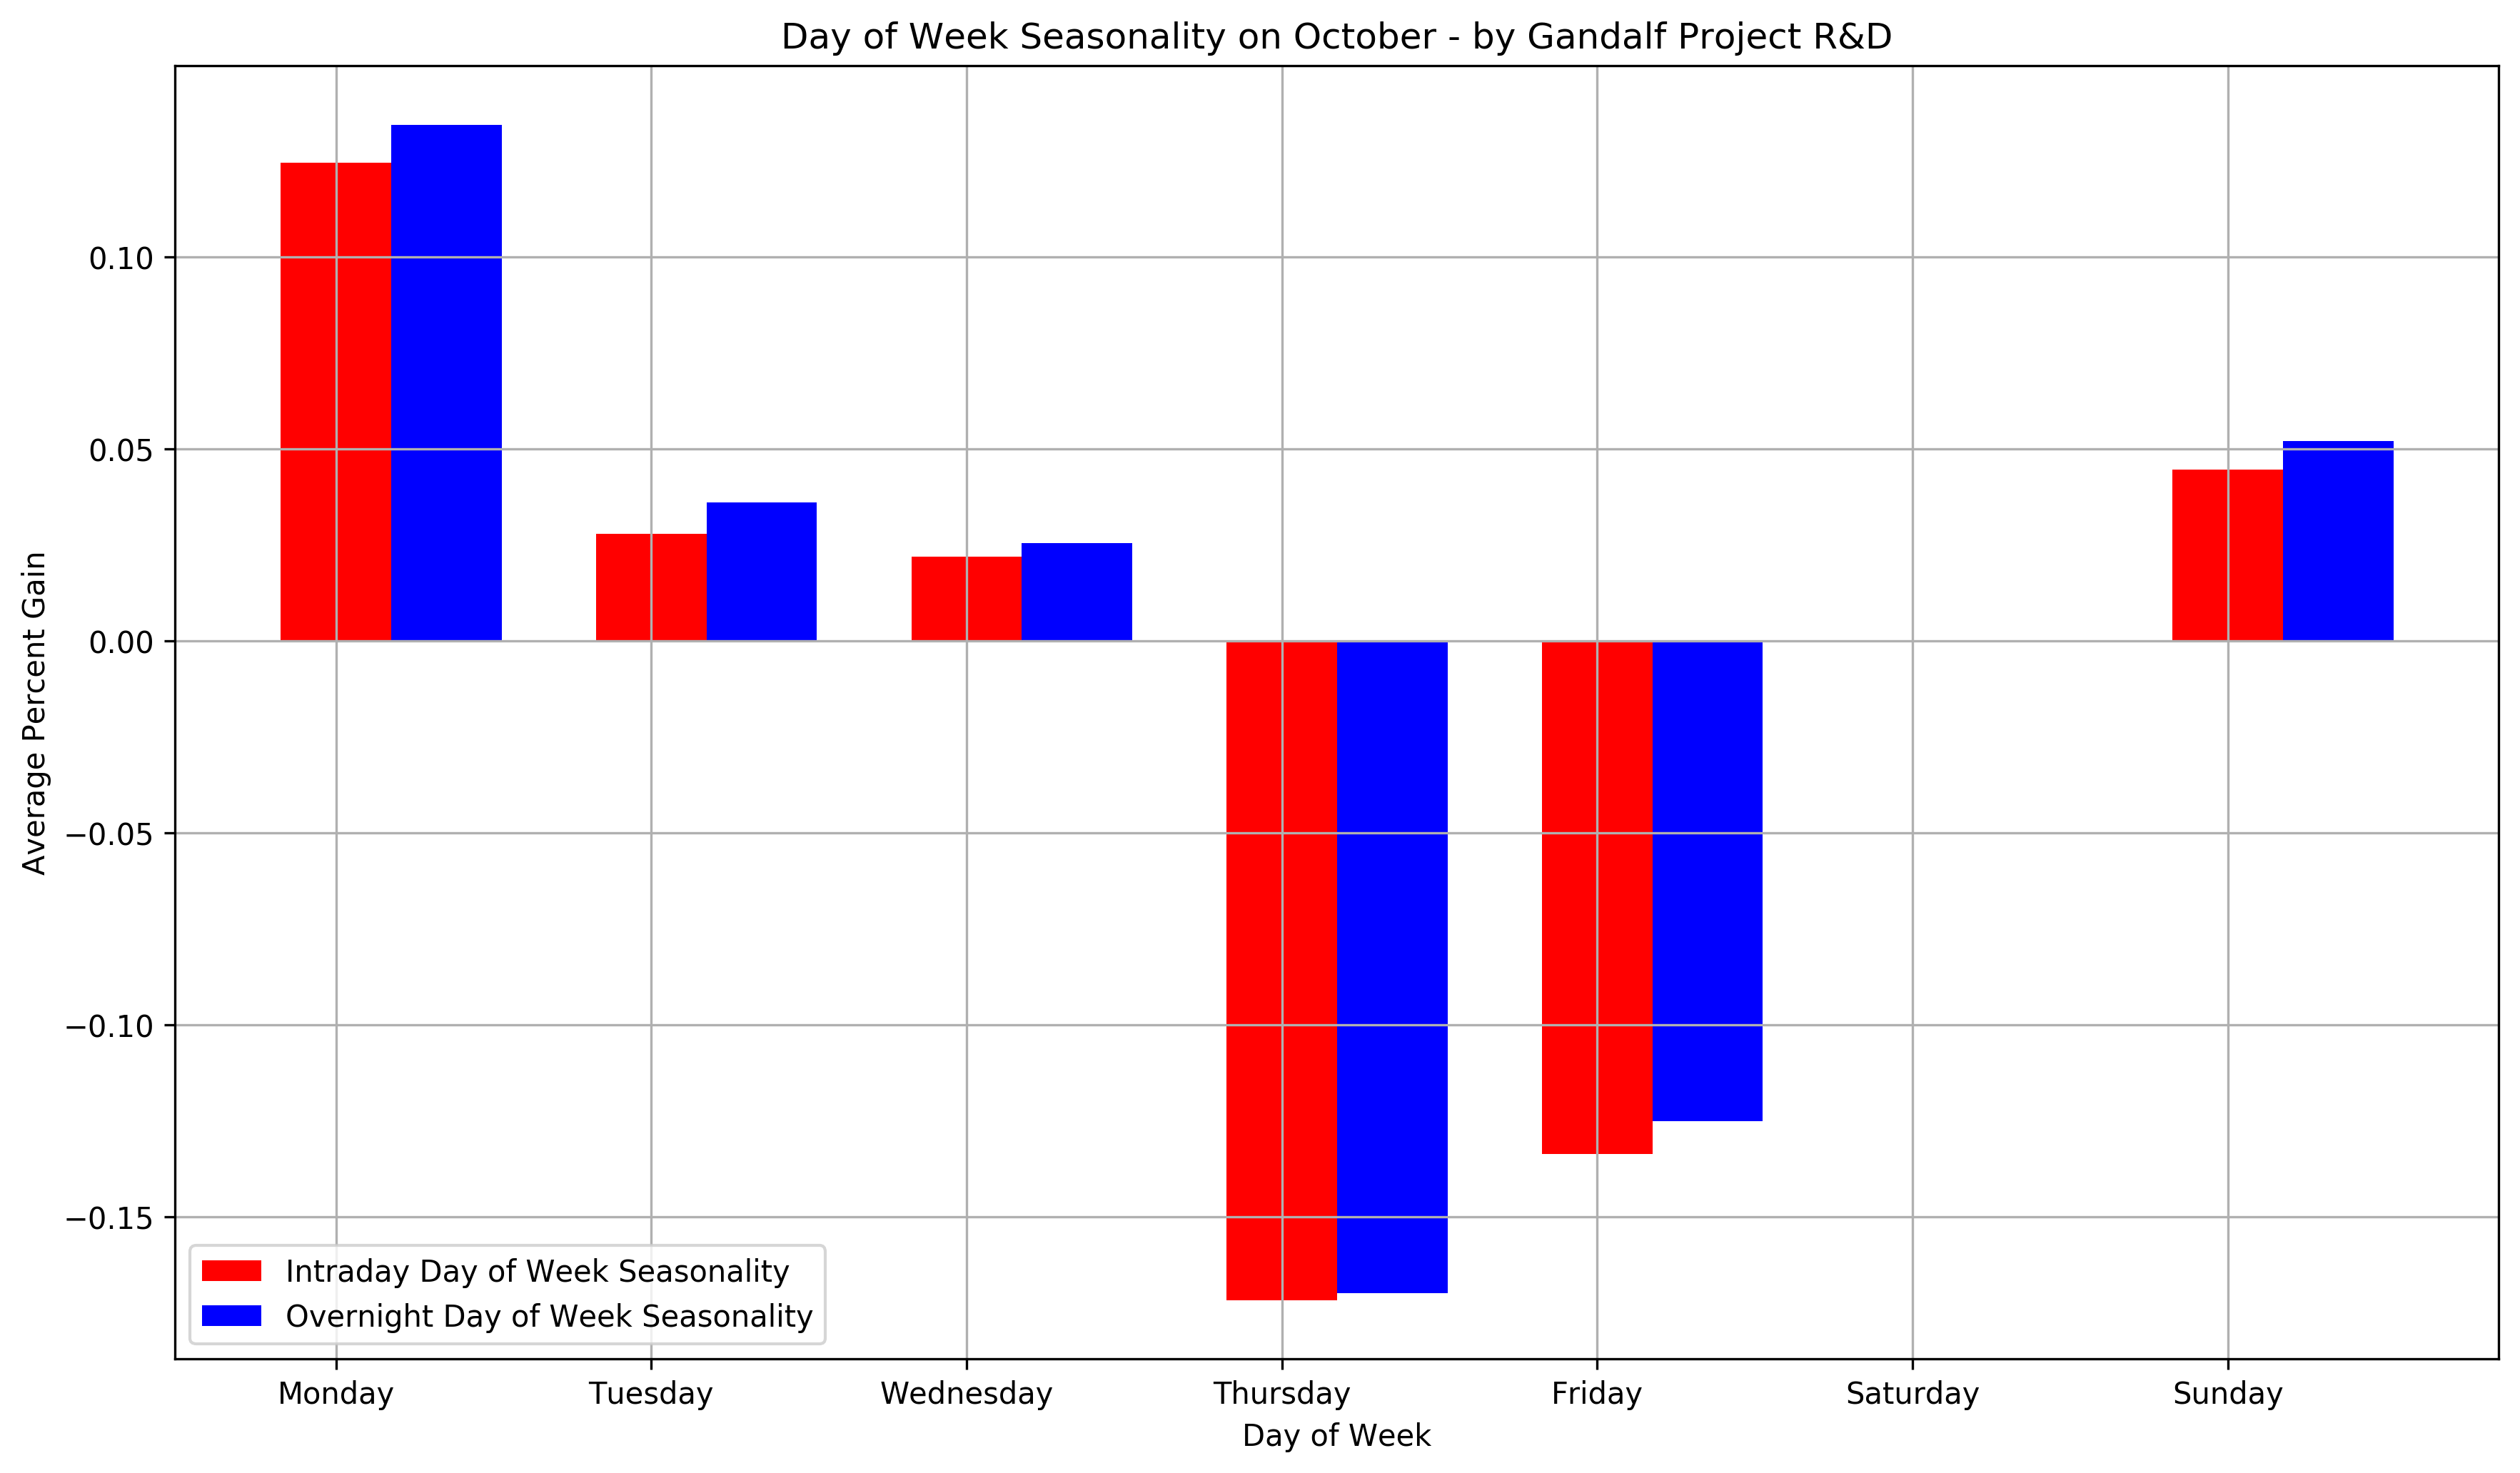

Statistics Intraday:
Monday 0.1244 53.7 %
Tuesday 0.0279 49.06 %
Wednesday 0.0219 53.7 %
Thursday -0.1717 54.72 %
Friday -0.1336 50.94 %
Sunday 0.0446 51.92 %

Statistics Overnight:
Monday 0.1344 53.7 %
Tuesday 0.036 49.06 %
Wednesday 0.0254 51.85 %
Thursday -0.1698 54.72 %
Friday -0.1251 49.06 %
Sunday 0.0521 53.85 %



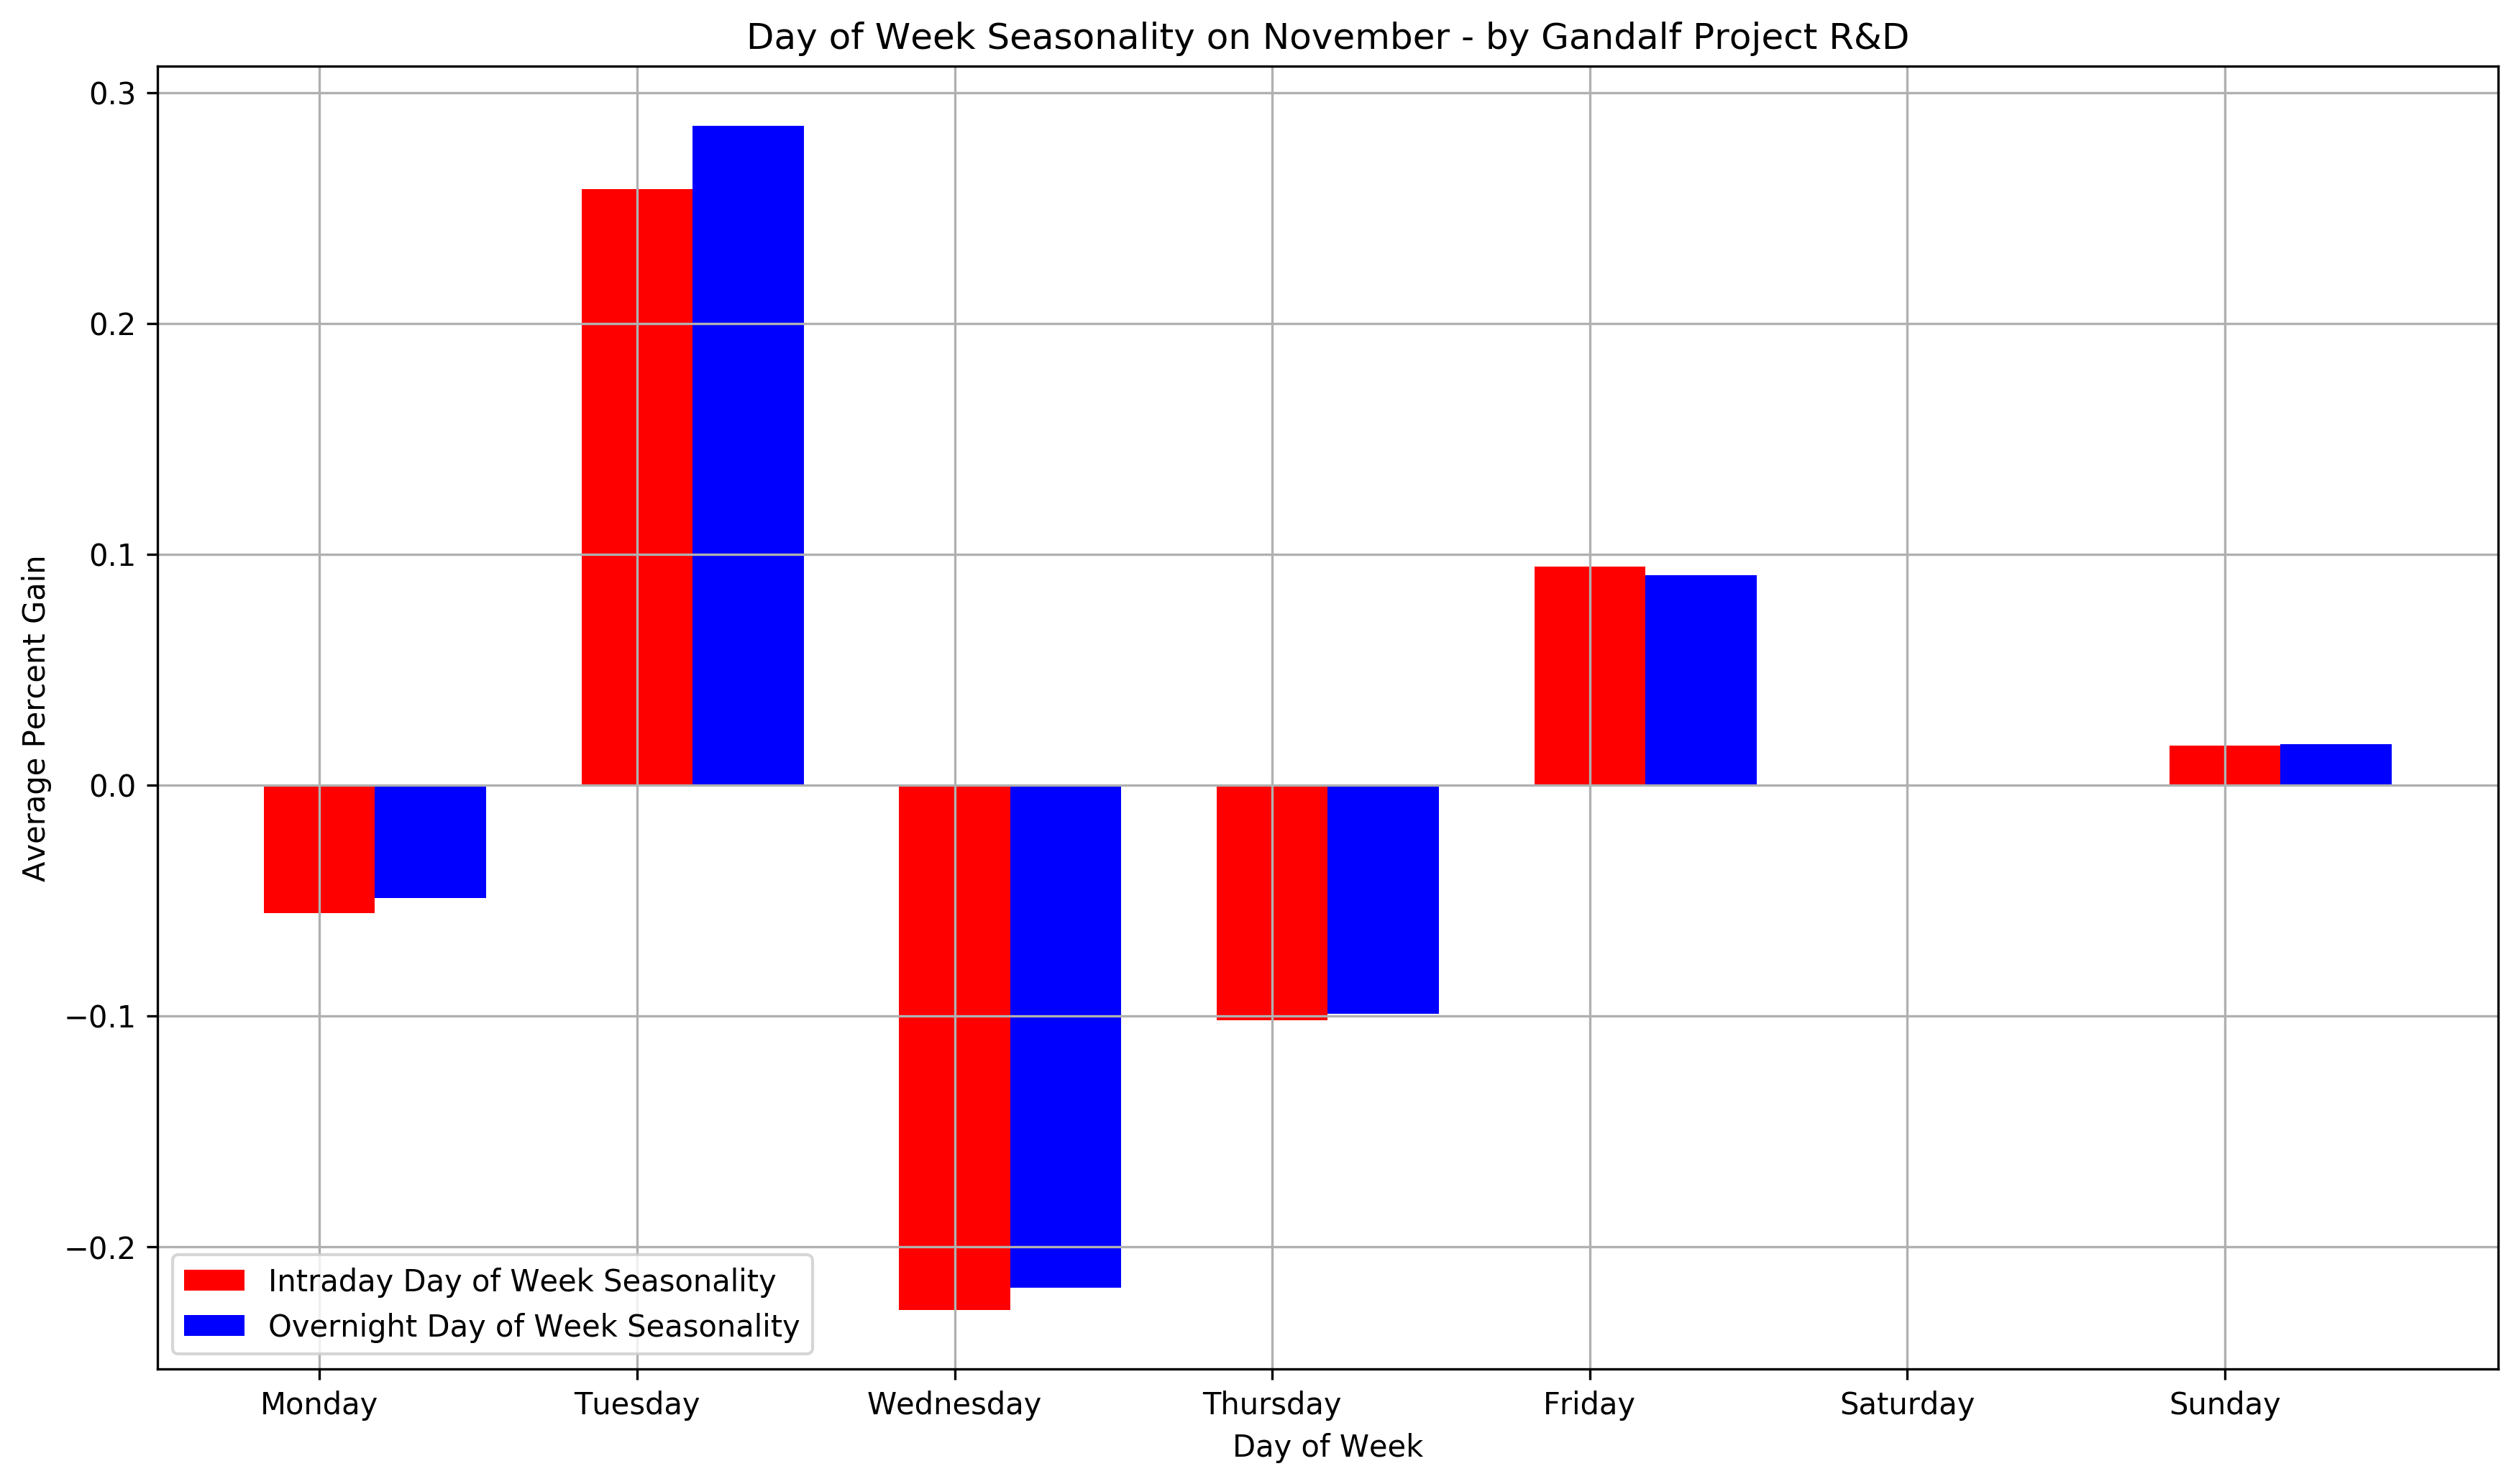

Statistics Intraday:
Monday -0.0555 45.1 %
Tuesday 0.258 54.9 %
Wednesday -0.2275 52.94 %
Thursday -0.1019 53.85 %
Friday 0.0946 48.08 %
Sunday 0.0169 48.08 %

Statistics Overnight:
Monday -0.049 50.98 %
Tuesday 0.2857 54.9 %
Wednesday -0.2178 52.94 %
Thursday -0.0992 51.92 %
Friday 0.091 48.08 %
Sunday 0.0175 46.15 %



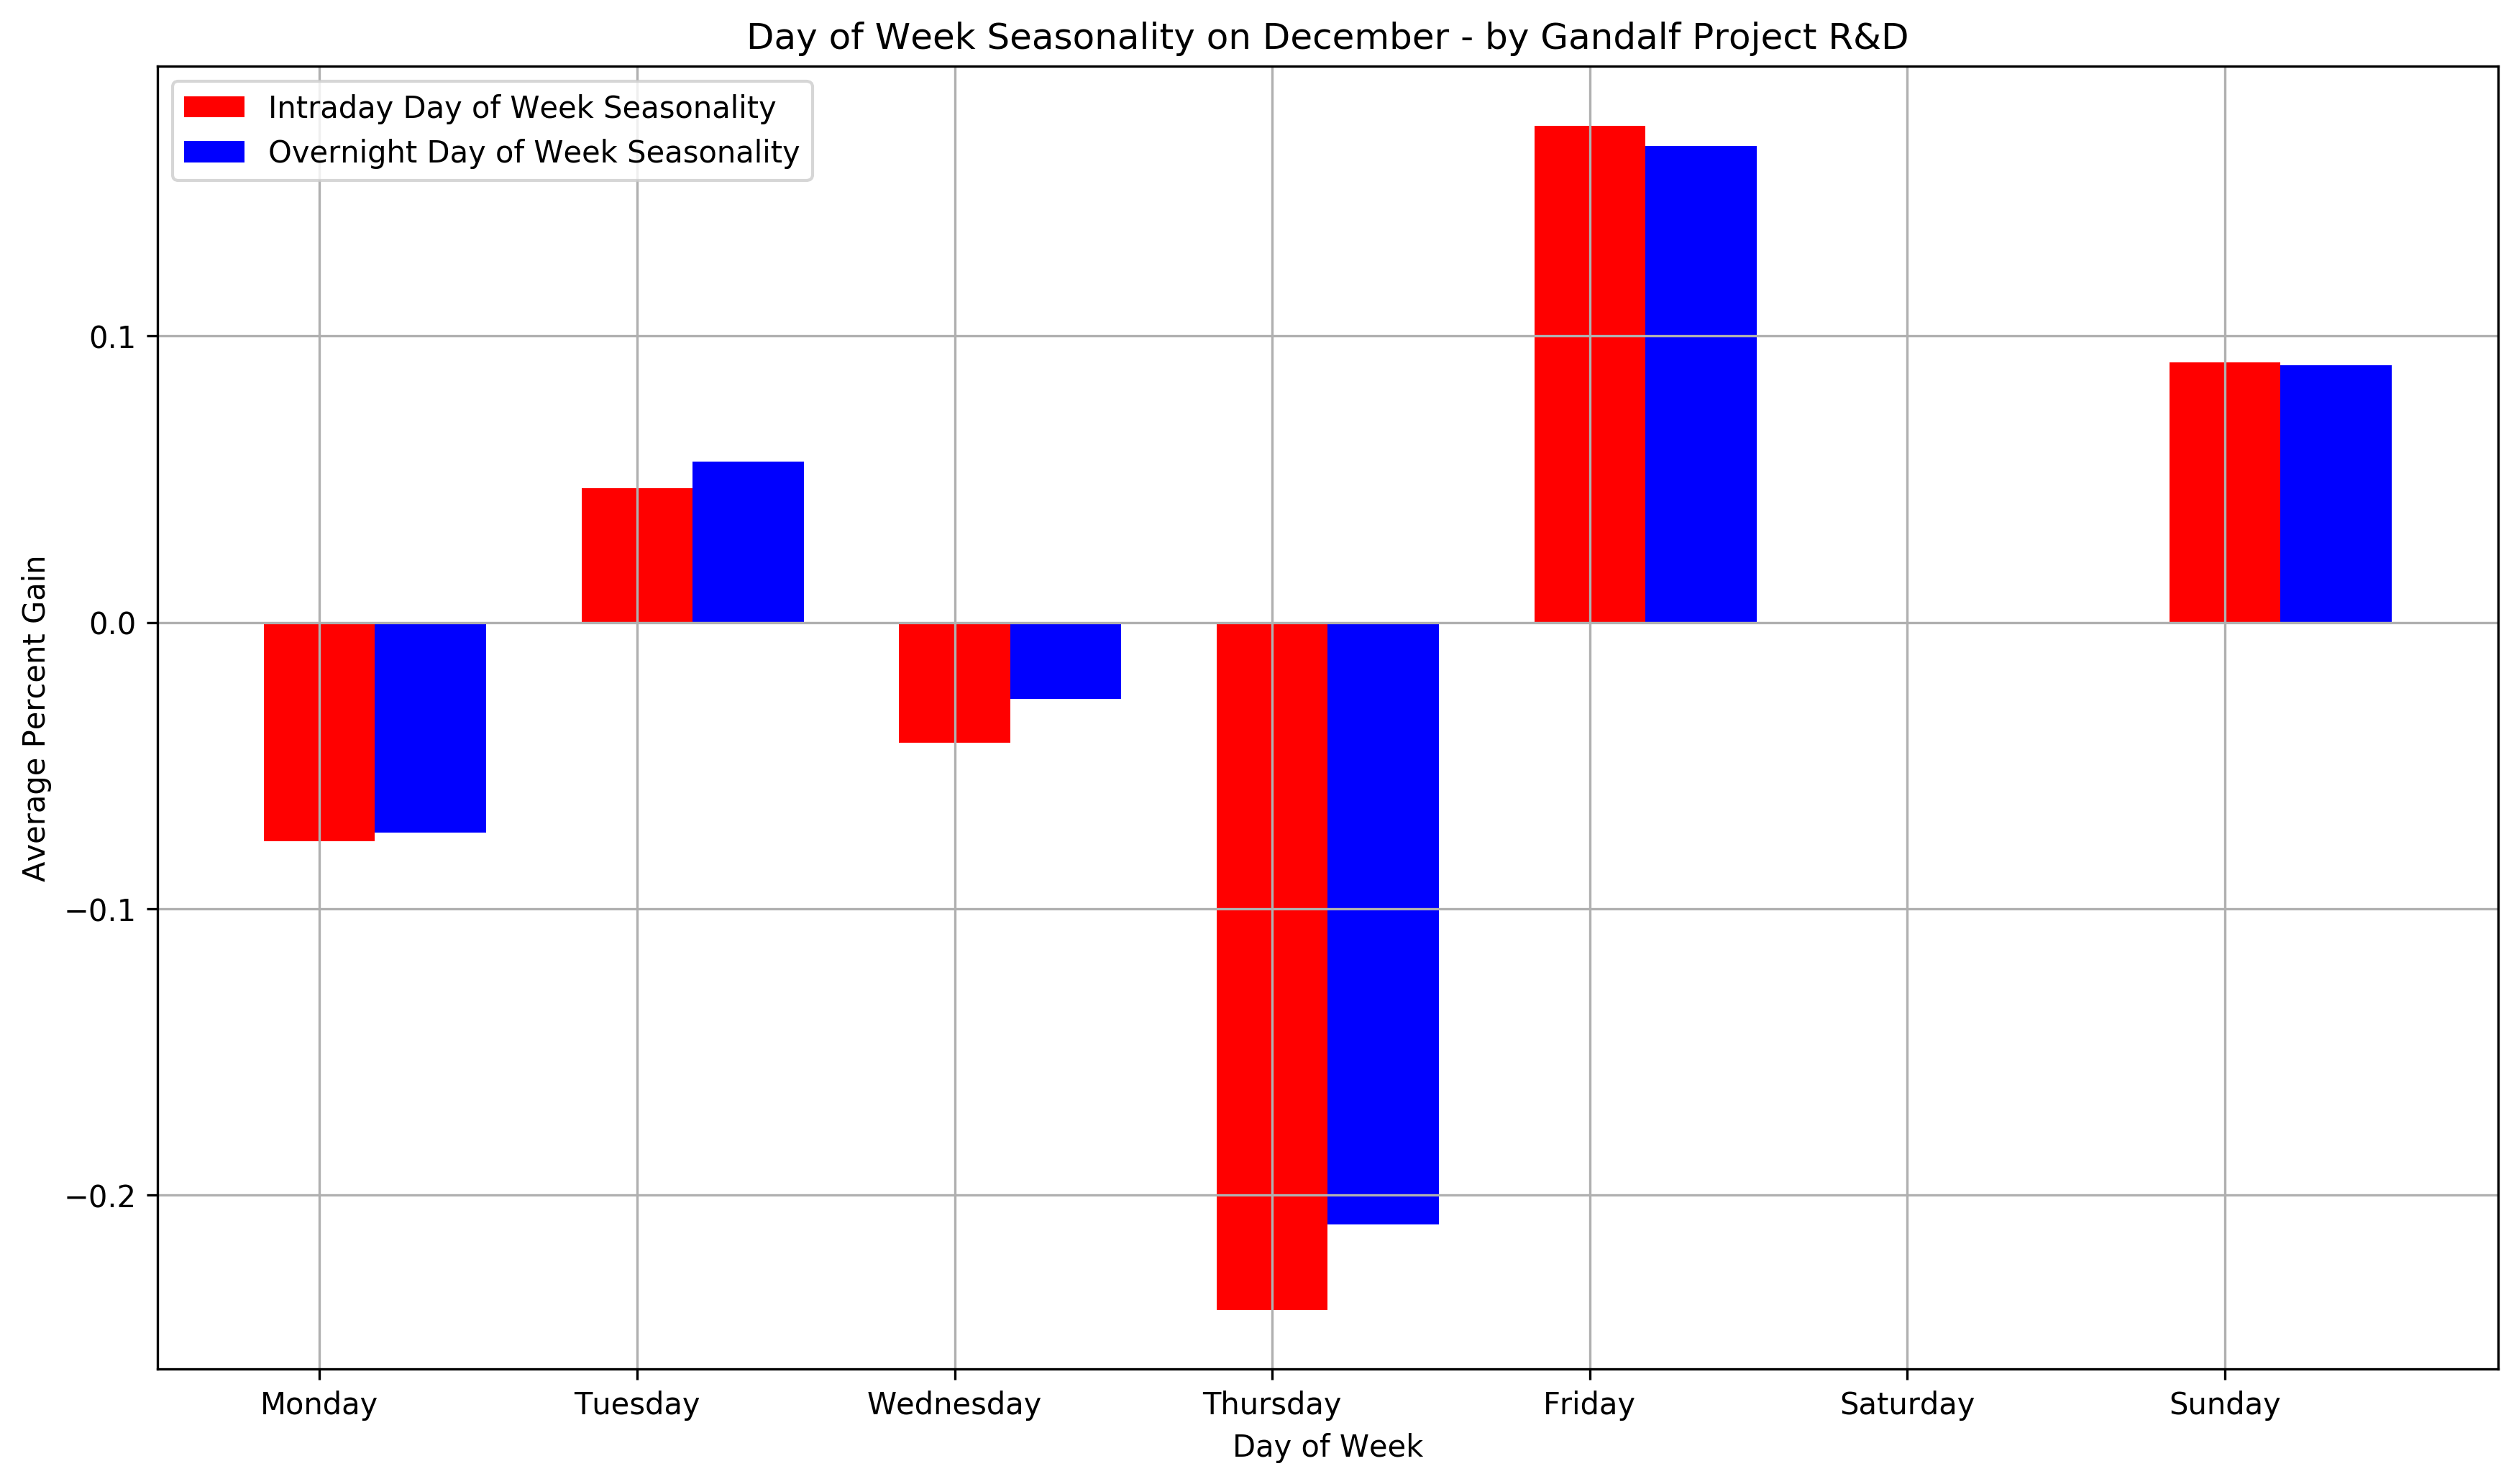

Statistics Intraday:
Monday -0.0763 42.59 %
Tuesday 0.0468 45.28 %
Wednesday -0.0421 54.72 %
Thursday -0.24 58.49 %
Friday 0.1735 61.22 %
Sunday 0.0908 51.02 %

Statistics Overnight:
Monday -0.0733 40.74 %
Tuesday 0.0562 52.83 %
Wednesday -0.0268 54.72 %
Thursday -0.2102 64.15 %
Friday 0.1663 63.27 %
Sunday 0.0898 53.06 %


In [12]:
for mkey, mvalue in months.items():
    biasWeeklyIntraday = []
    biasWeeklyOverNight = []
    DayOfWeek_Intraday_Statistics = []
    DayOfWeek_OverNight_Statistics = []
    
    for dkey, dvalue in dow.items():
        biasWeeklyIntraday.append(daily[(daily['DOW'] == dvalue) & 
                                        (daily['Month'] == mvalue)]['DailyCloseOpenPerc'].mean())
        biasWeeklyOverNight.append(daily[(daily['DOW'] == dvalue) & 
                                         (daily['Month']== mvalue)]['DailyDeltaClosePerc'].mean())
        
        intraday = daily[(daily['DOW'] == dvalue) & (daily['Month'] == mvalue)]['DailyCloseOpenPerc'].dropna()
        DayOfWeek_Intraday_Statistics.append(percPosNeg(intraday, 0))
        
        overnight = daily[(daily['DOW'] == dvalue) & (daily['Month'] == mvalue)]['DailyDeltaClosePerc'].dropna()
        DayOfWeek_OverNight_Statistics.append(percPosNeg(overnight, 0))

    print("")
    month_plot(biasWeeklyIntraday,biasWeeklyOverNight,mkey)
    
    print("Statistics Intraday:")
    for el in range(len(DayOfWeek_Intraday_Statistics)):
        if biasWeeklyIntraday[el] > 0:
            print(daysofweek_names[el], round(biasWeeklyIntraday[el], 4), 
                  DayOfWeek_Intraday_Statistics[el][0], "%")
        if biasWeeklyIntraday[el] <= 0:
            print(daysofweek_names[el], round(biasWeeklyIntraday[el], 4), 
                  DayOfWeek_Intraday_Statistics[el][1], "%")

    print("")
    print("Statistics Overnight:")
    for el in range(len(DayOfWeek_OverNight_Statistics)):
        if biasWeeklyOverNight[el] > 0:
            print(daysofweek_names[el], round(biasWeeklyOverNight[el], 4), 
                  DayOfWeek_OverNight_Statistics[el][0], "%")
        if biasWeeklyOverNight[el] <= 0:
            print(daysofweek_names[el], round(biasWeeklyOverNight[el], 4), 
                  DayOfWeek_OverNight_Statistics[el][1], "%")